In [1]:
import pandas as pd

## Getting data

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


At first it looks like there are many missing values

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# EDA

## Univariate analysis

Columns with over 17% missing values, will get difficult to fill, that's why we are going to erase it

In [4]:
import pandas as pd

def summarize_nulls(df):
    null_counts = df.isnull().sum()
    null_percentage = (null_counts / len(df)) * 100

    null_summary = pd.DataFrame({
        'Null Count': null_counts,
        'Null Percentage': null_percentage
    }).sort_values(by='Null Count', ascending=False)

    # Filter out columns that have no nulls
    null_summary = null_summary[null_summary['Null Count'] > 0]

    return null_summary

summary = summarize_nulls(df_train)
summary

,Null Count,Null Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageQual,81,5.547945
GarageFinish,81,5.547945
GarageType,81,5.547945


In [5]:
null_percentage = df_train.isnull().mean() * 100
null_percentage

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [6]:
df_cleaned = df_train.loc[:, null_percentage <= 17]

After droping columns with null values over 17%, we just have columns with less than 6% of missing values

In [7]:
summary = summarize_nulls(df_cleaned)
summary

,Null Count,Null Percentage
GarageYrBlt,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945
BsmtFinType2,38,2.602740
BsmtExposure,38,2.602740
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtFinType1,37,2.534247


In [8]:
df_cleaned['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

We are going to plot the histograms of each one and then see how much the distribution after filling the nulls with mean or mode make a difference on the distribution

### GarageYrBlt

In [9]:
import matplotlib.pyplot as plt

def plot_hist(df, column, bins=30):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=bins, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

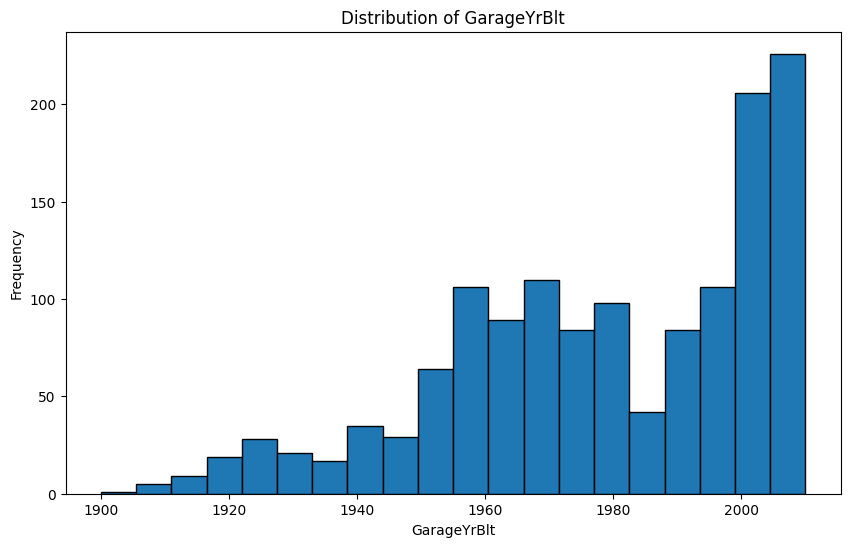

In [10]:
plot_hist(df_cleaned, 'GarageYrBlt', bins=20)

In [11]:
df_cleaned['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

We see that the mean value is around 1978 so, if we would put that value for filling the nulls, that would cause a different distribution, but instead if we use the mode, the distribution would keep almost the same with a predominant values at the right

In [12]:
mode_value = df_cleaned['GarageYrBlt'].mode()
df_cleaned['GarageYrBlt'].fillna(mode_value, inplace=True)

C:\Users\quine\AppData\Local\Temp\ipykernel_8912\2572099471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['GarageYrBlt'].fillna(mode_value, inplace=True)
C:\Users\quine\AppData\Local\Temp\ipykernel_8912\2572099471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['GarageYrBlt'].fillna(mode_value, inplace=True)


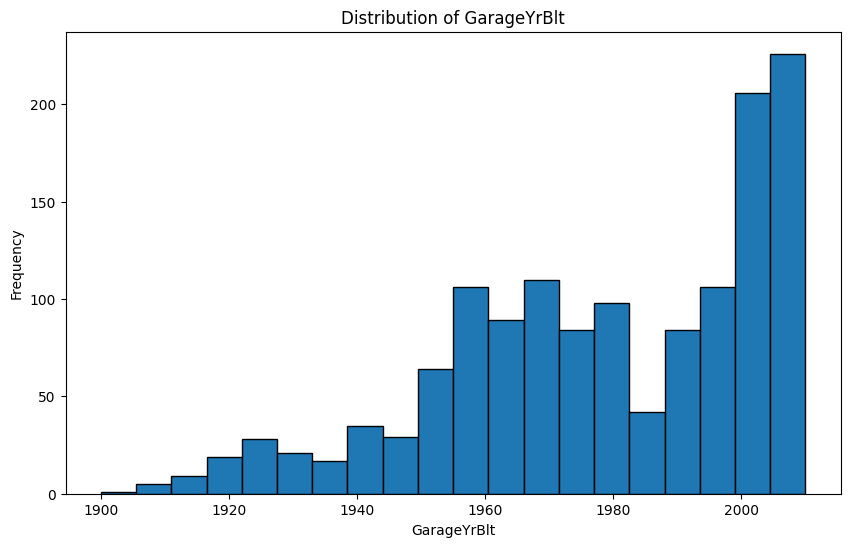

In [13]:
plot_hist(df_cleaned, 'GarageYrBlt', bins=20)

As we see, the distribution is almost the same, we will use the same approach for the other columns 

### GarageQual

For this variable, we can notice that the category 'TA' has a huge proportion of all values in the dataset, so, even if we manage to reduce the categories the proporcion would be too little for non-TA categories, we will drop this

In [14]:
df_cleaned['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [15]:
df_cleaned = df_cleaned.drop('GarageQual', axis=1)

### GarageCond

In [16]:
df_cleaned['GarageCond'].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

As we did priously we will drop this column

In [17]:
df_cleaned = df_cleaned.drop('GarageCond', axis=1)

### GarageType

In [18]:
df_cleaned['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

Here we will use the most common category for filling the nulls

In [19]:
most_common_category = df_cleaned['GarageType'].mode()[0]  # <-- [0] to get the first value
df_cleaned['GarageType'] = df_cleaned['GarageType'].fillna(most_common_category)


### GarageFinish

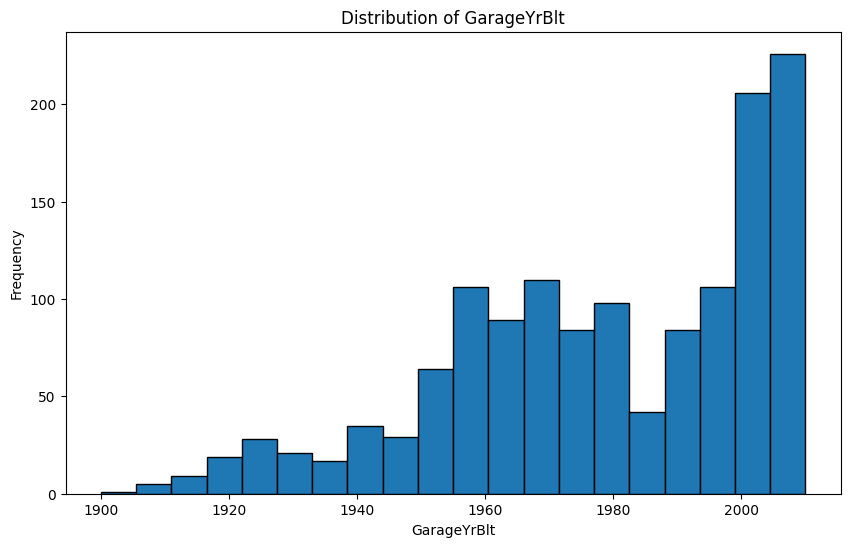

In [20]:
plot_hist(df_cleaned, 'GarageYrBlt', bins=20)

In [21]:
df_cleaned['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

Here we will use the mode

In [22]:
mode_value = df_cleaned['GarageYrBlt'].mode()
df_cleaned['GarageYrBlt'] = df_cleaned['GarageYrBlt'].fillna(mode_value[0])  # <-- [0] to get the first value

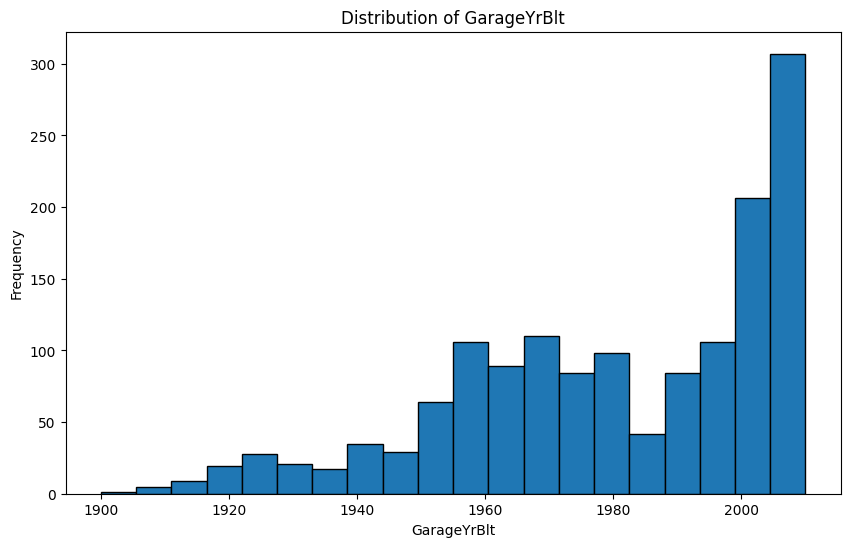

In [23]:
plot_hist(df_cleaned, 'GarageYrBlt', bins=20)

### BsmtFinType2

In [24]:
df_cleaned['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

Here we will replace the nulls with the most common category

In [25]:
most_common_category = df_cleaned['BsmtFinType2'].mode()[0]
df_cleaned['BsmtFinType2'] = df_cleaned['BsmtFinType2'].fillna(most_common_category)

### BsmtExposure

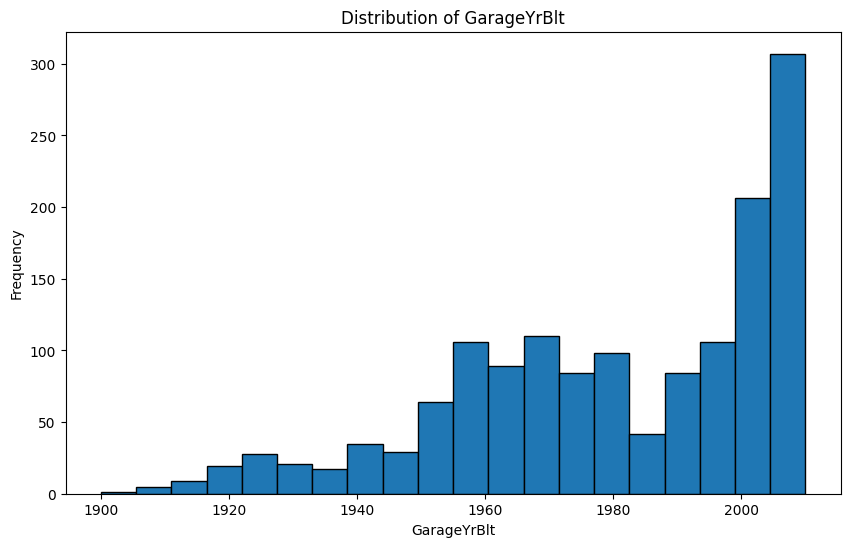

In [26]:
plot_hist(df_cleaned, 'GarageYrBlt', bins=20)

In [27]:
df_cleaned['GarageYrBlt'].describe()

count    1460.000000
mean     1979.976027
std        24.749688
min      1900.000000
25%      1962.000000
50%      1984.500000
75%      2003.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

Here we will use the mode

In [28]:
mode_value = df_cleaned['GarageYrBlt'].mode()
df_cleaned['GarageYrBlt'] = df_cleaned['GarageYrBlt'].fillna(mode_value[0])  # <-- [0] to get the first value 

### BsmtQual

In [29]:
df_cleaned['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [30]:
most_common_category = df_cleaned['BsmtQual'].mode()[0]
df_cleaned['BsmtQual'] = df_cleaned['BsmtQual'].fillna(most_common_category)

### BsmtCond

In [31]:
df_cleaned['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [32]:
most_common_category = df_cleaned['BsmtCond'].mode()[0]  
df_cleaned['BsmtCond'] = df_cleaned['BsmtCond'].fillna(most_common_category)

### BsmtFinType1

In [33]:
df_cleaned['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [34]:
most_common_category = df_cleaned['BsmtFinType1'].mode()[0]  # <-- [0] to get the first value
df_cleaned['BsmtFinType1'] = df_cleaned['BsmtFinType1'].fillna(most_common_category)

### MasVnrArea

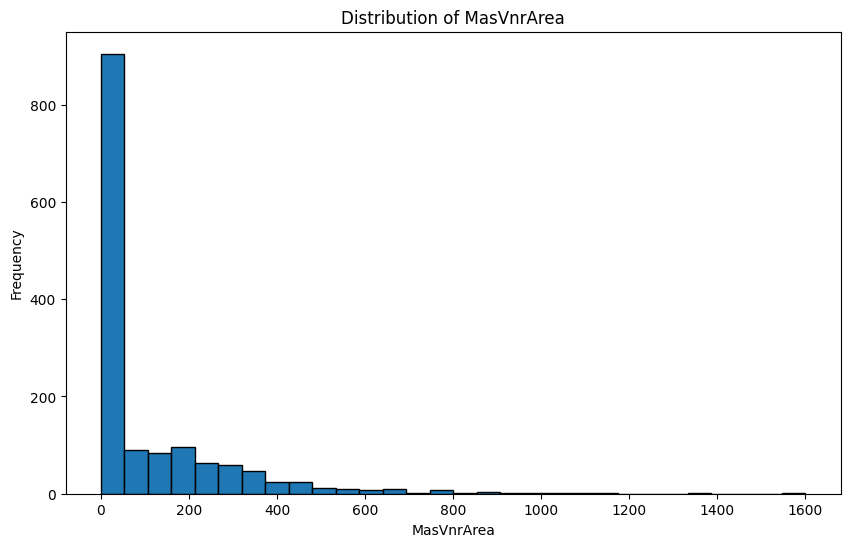

In [35]:
plot_hist(df_cleaned, 'MasVnrArea', bins=30)

In [36]:
df_cleaned['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [37]:
mode_value = df_cleaned['MasVnrArea'].mode()
df_cleaned['MasVnrArea'] = df_cleaned['MasVnrArea'].fillna(mode_value[0])  

### Electrical

In [38]:
df_cleaned['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [39]:
most_common_category = df_cleaned['Electrical'].mode()[0]  # <-- [0] to get the first value
df_cleaned['Electrical'] = df_cleaned['Electrical'].fillna(most_common_category)

### GarageFinish

In [40]:
df_cleaned['GarageFinish'].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [41]:
most_common_category = df_cleaned['GarageFinish'].mode()[0]  # <-- [0] to get the first value
df_cleaned['GarageFinish'] = df_cleaned['GarageFinish'].fillna(most_common_category)

### BsmtExposure

In [42]:
df_cleaned['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [43]:
most_common_category = df_cleaned['BsmtExposure'].mode()[0]  # <-- [0] to get the first value
df_cleaned['BsmtExposure'] = df_cleaned['BsmtExposure'].fillna(most_common_category)

We will check if there are some null values missings to fill

In [44]:
summary = summarize_nulls(df_cleaned)
summary

,Null Count,Null Percentage


We will configure this to fully display the views

In [45]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [46]:
df_cleaned.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1979.976027,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.749688,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.500000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [47]:
# all minus objects and categorical
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns.tolist()

print(f"Amount of numerical columns: {len(numerical_columns)}")
numerical_columns

Amount of numerical columns: 37


['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

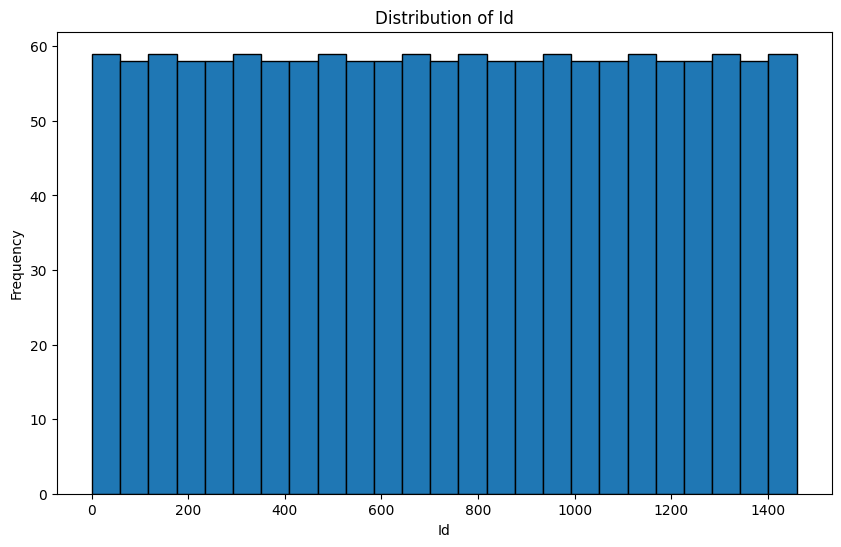

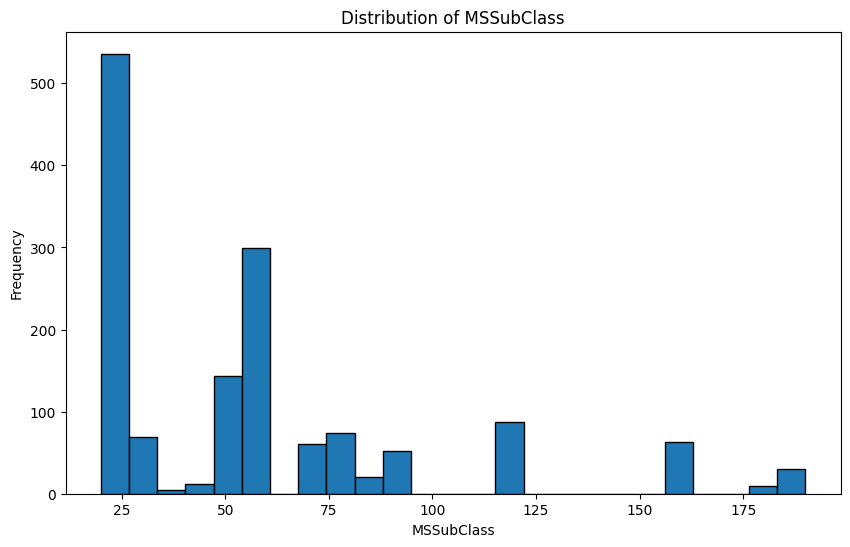

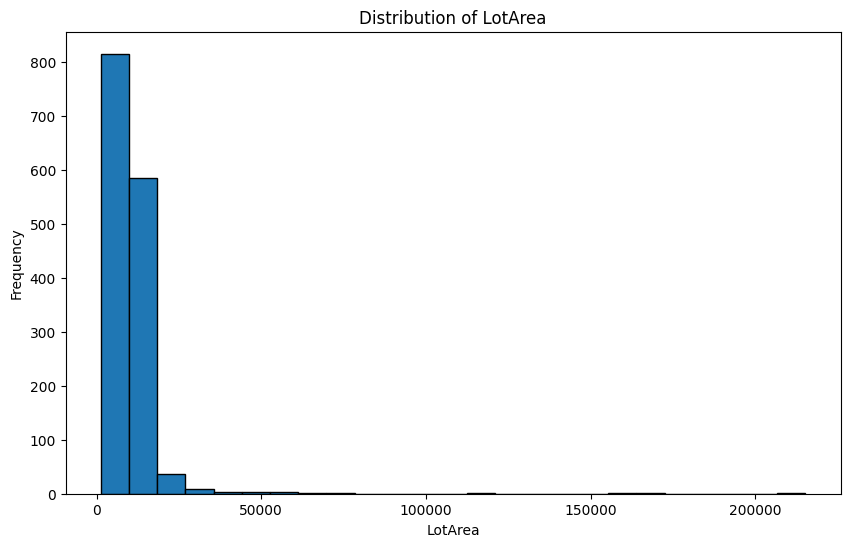

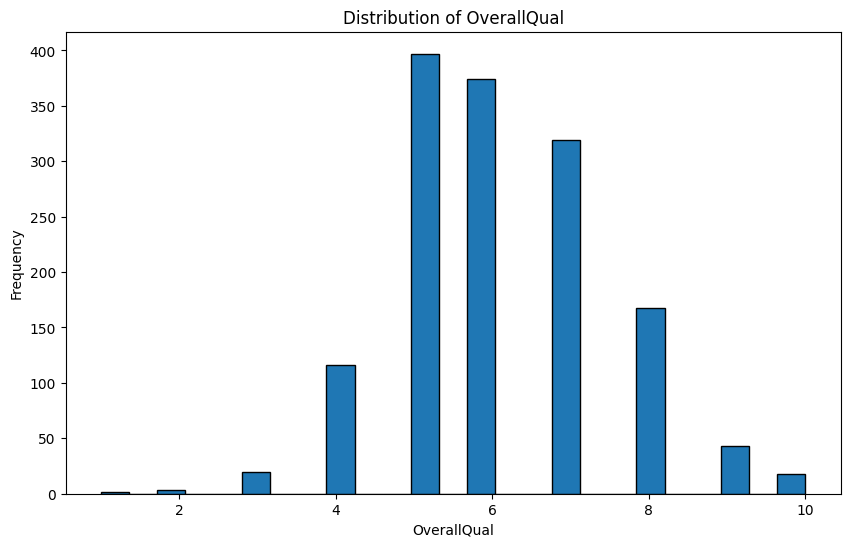

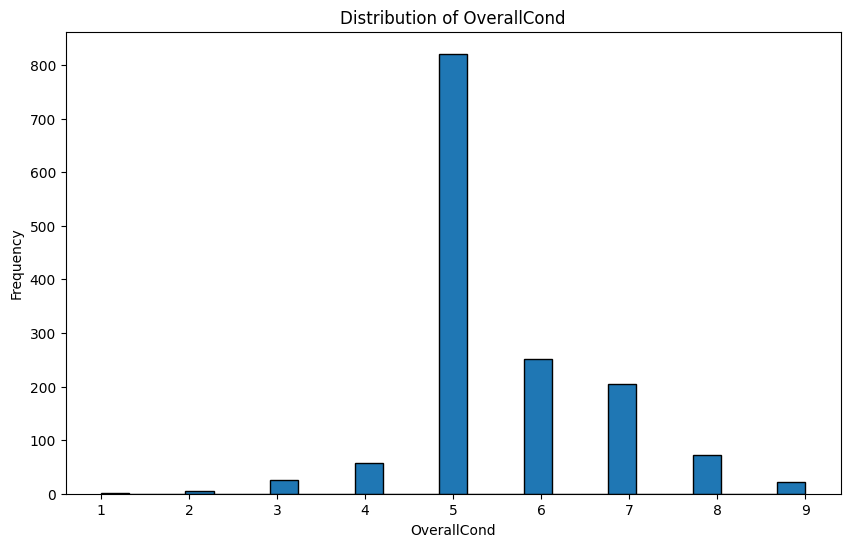

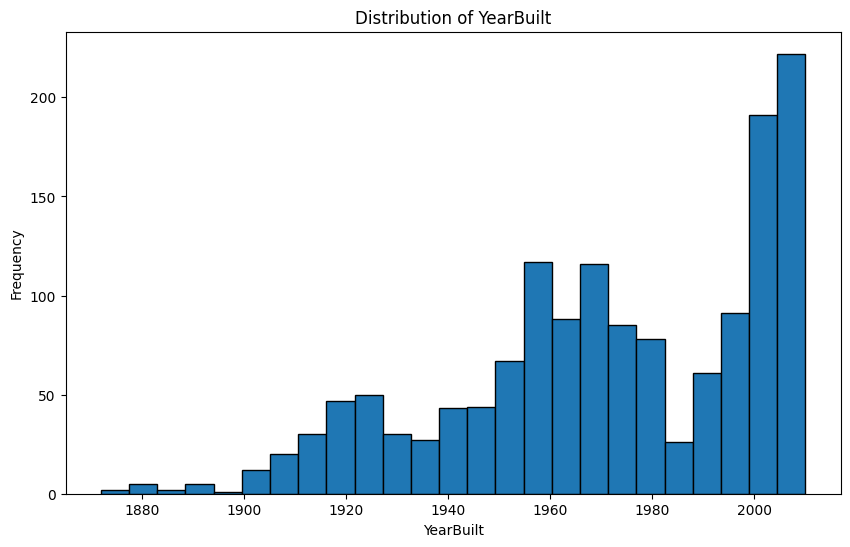

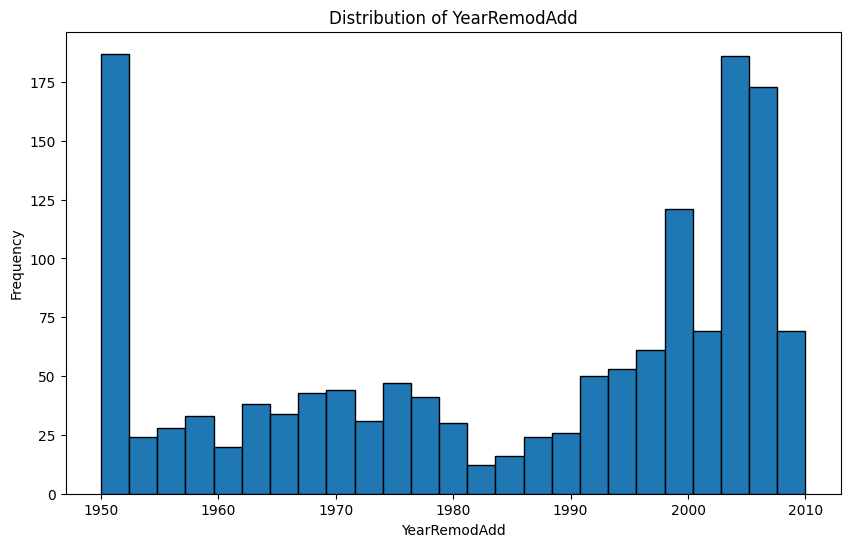

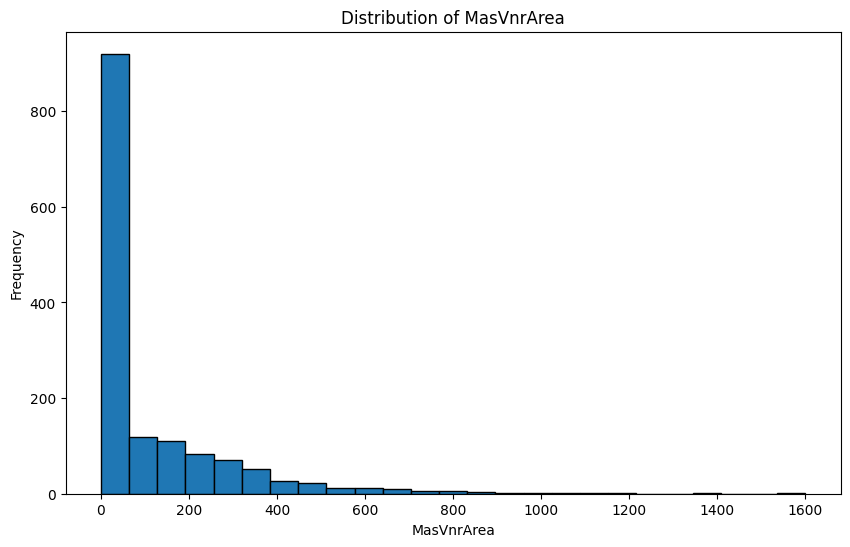

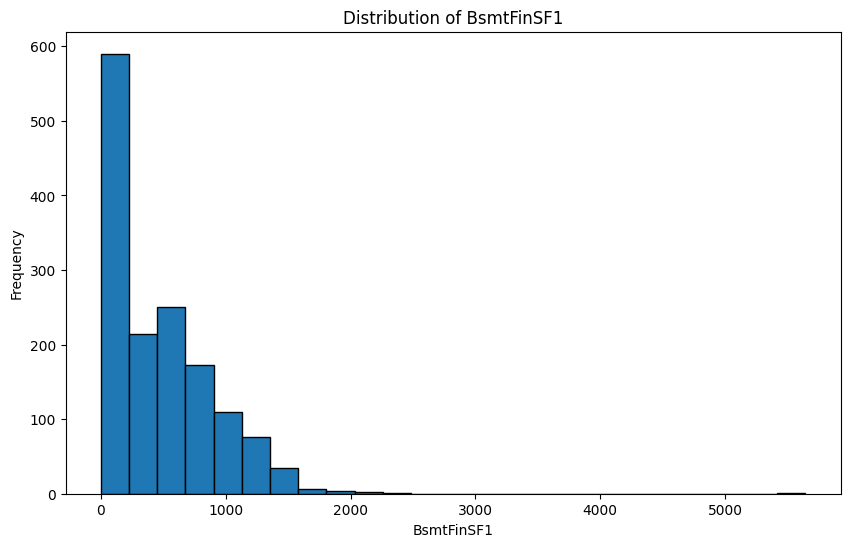

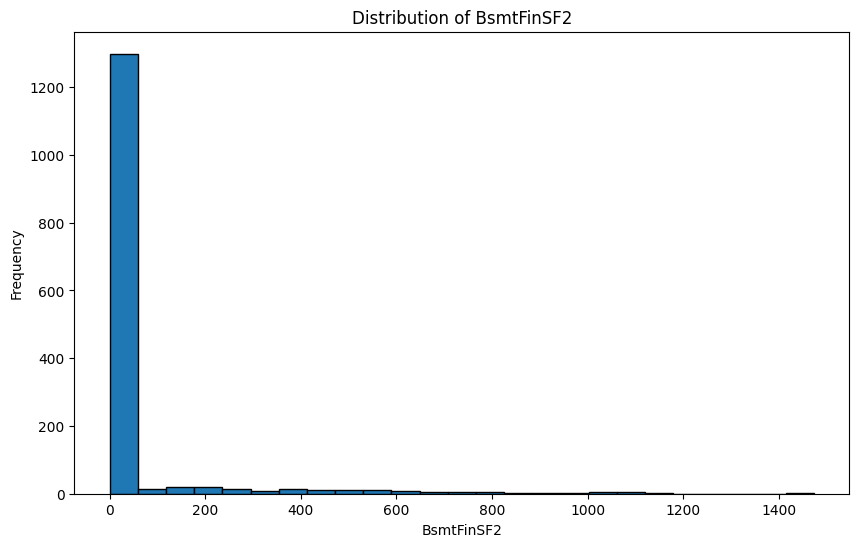

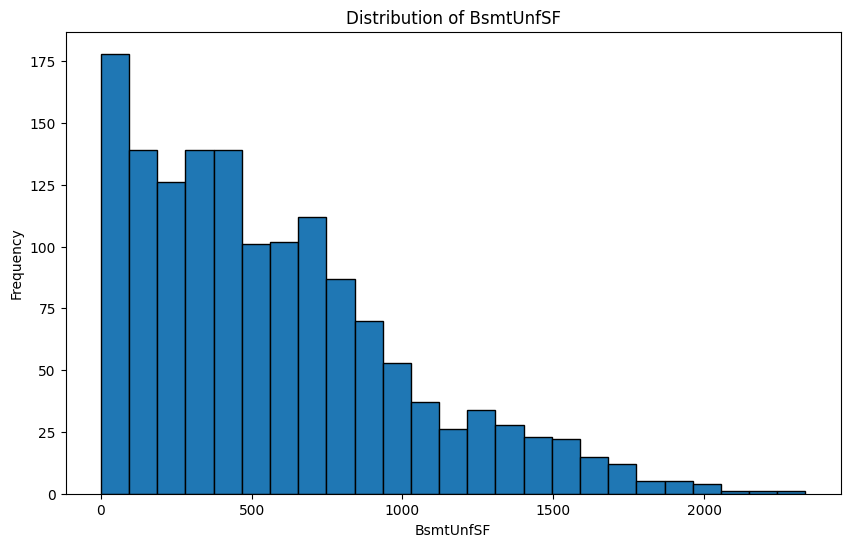

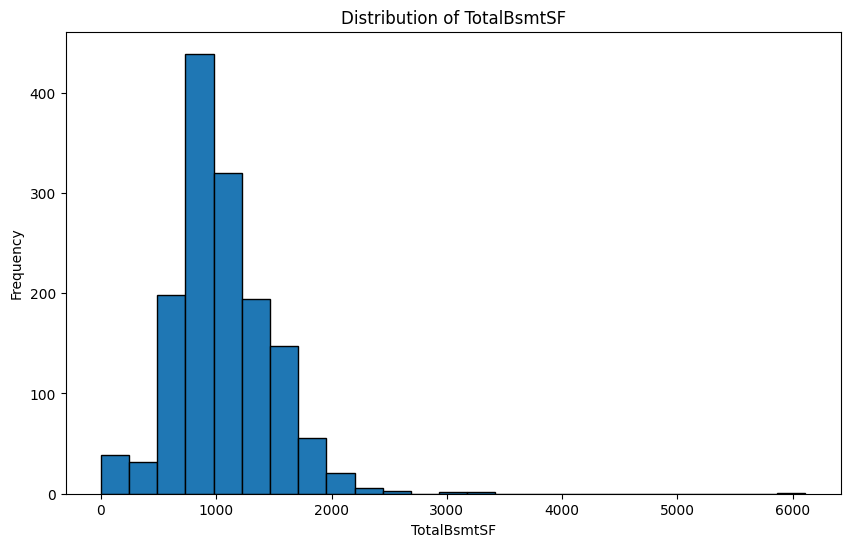

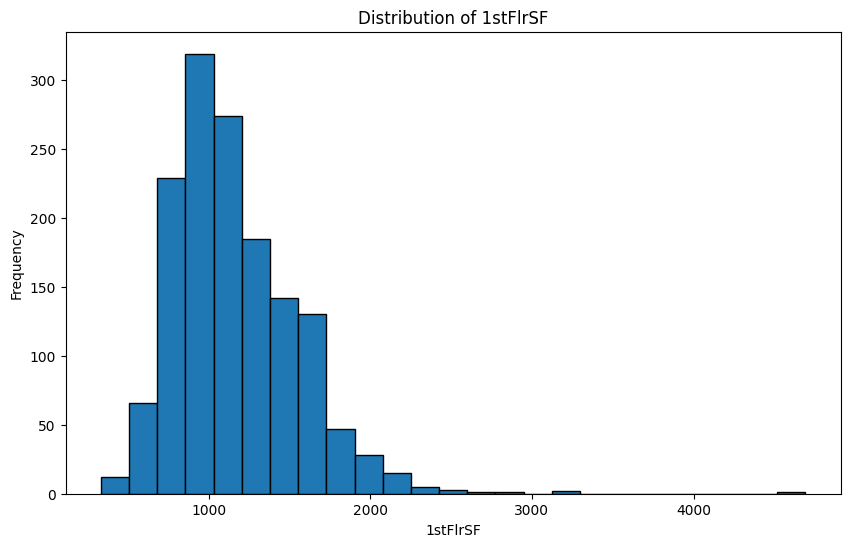

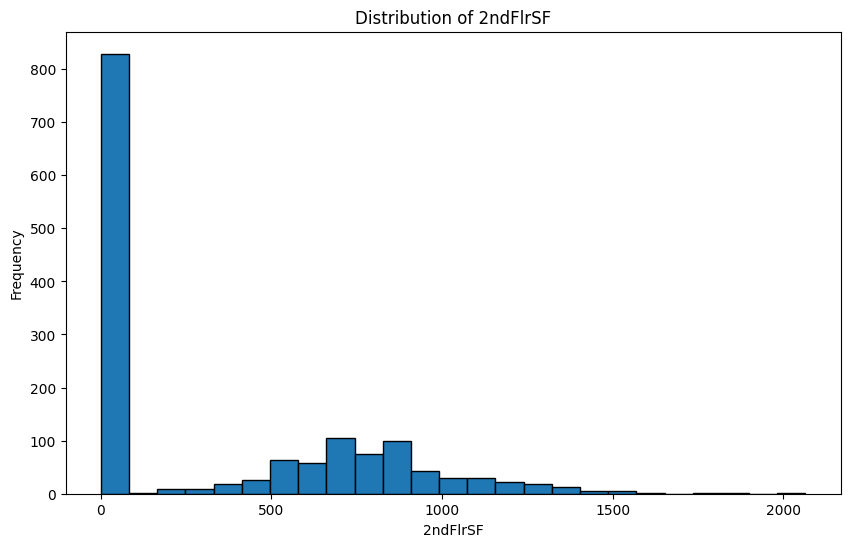

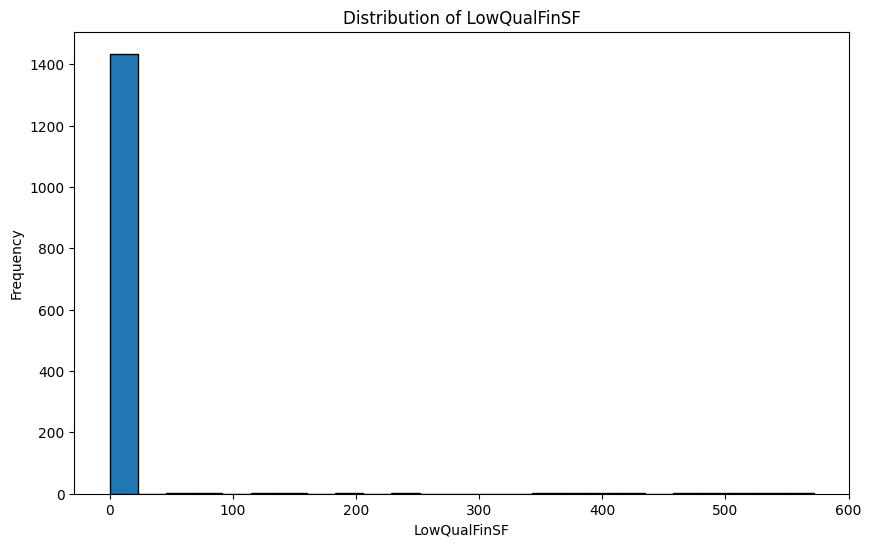

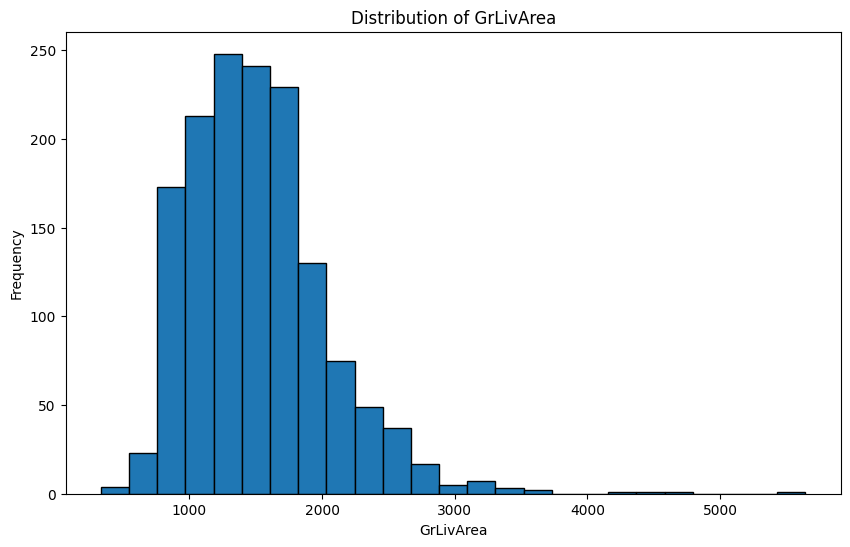

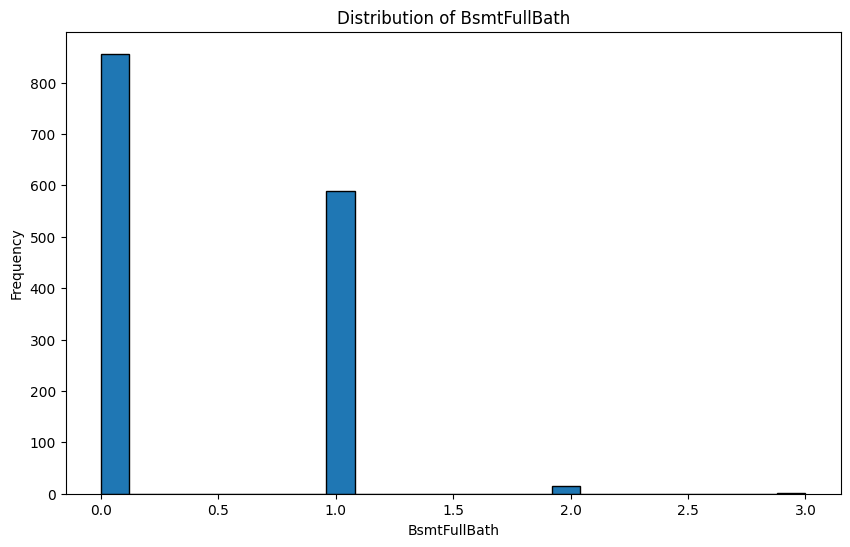

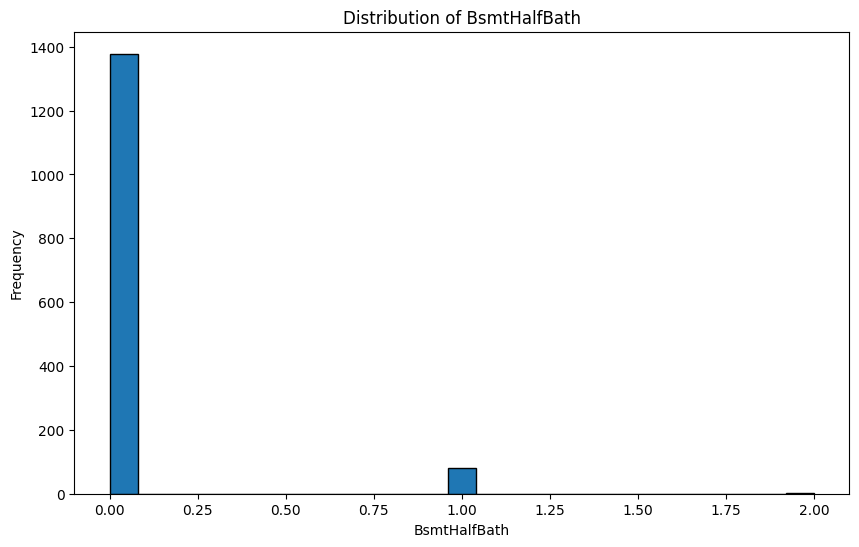

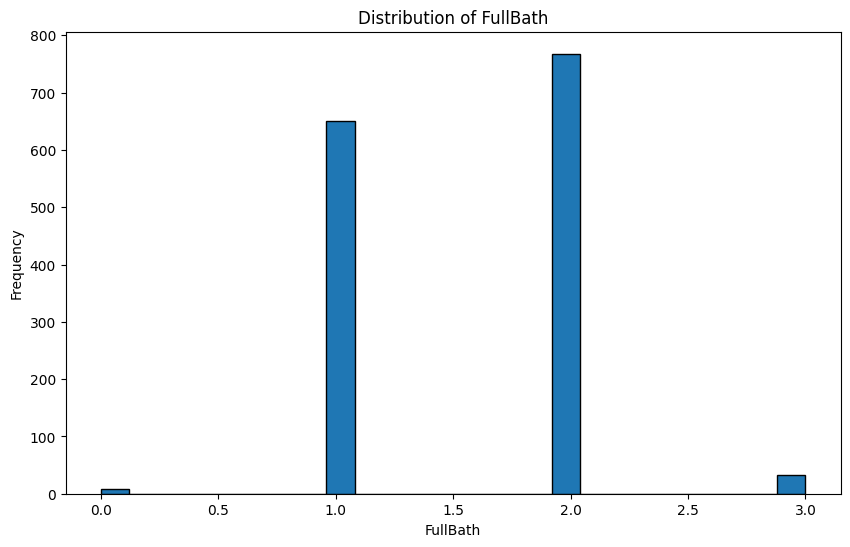

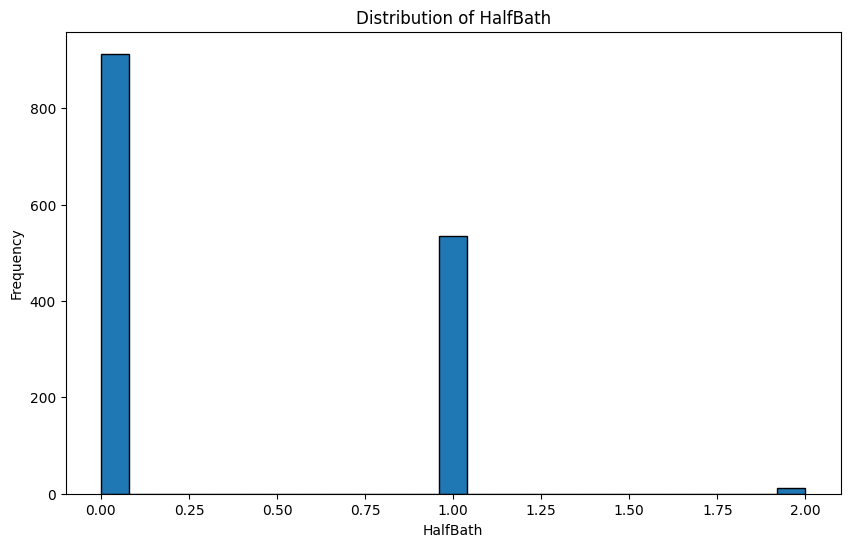

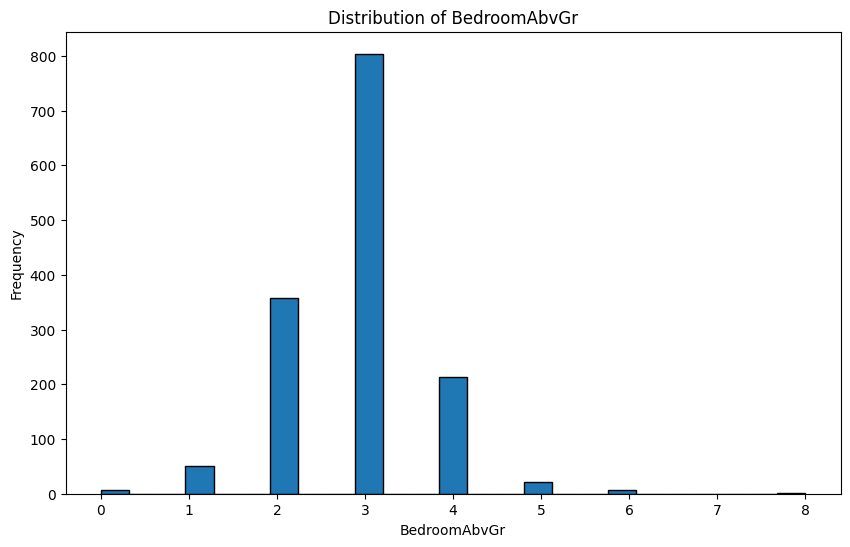

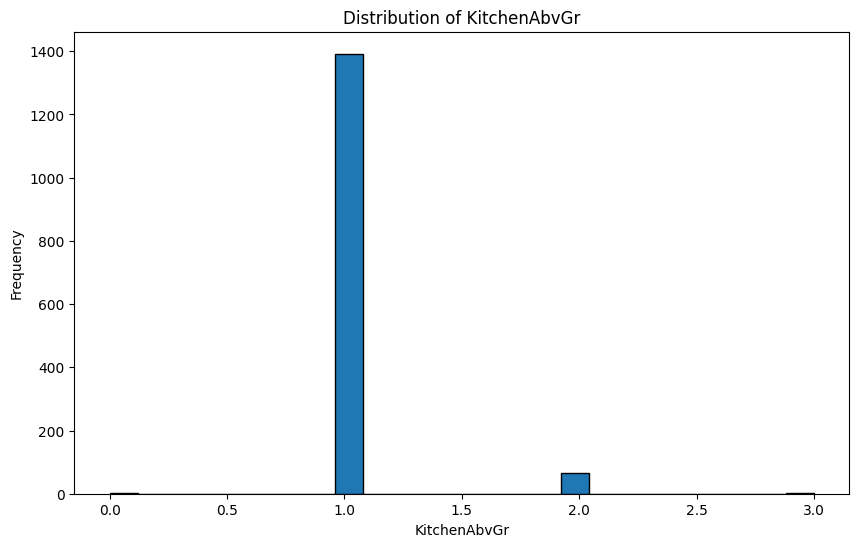

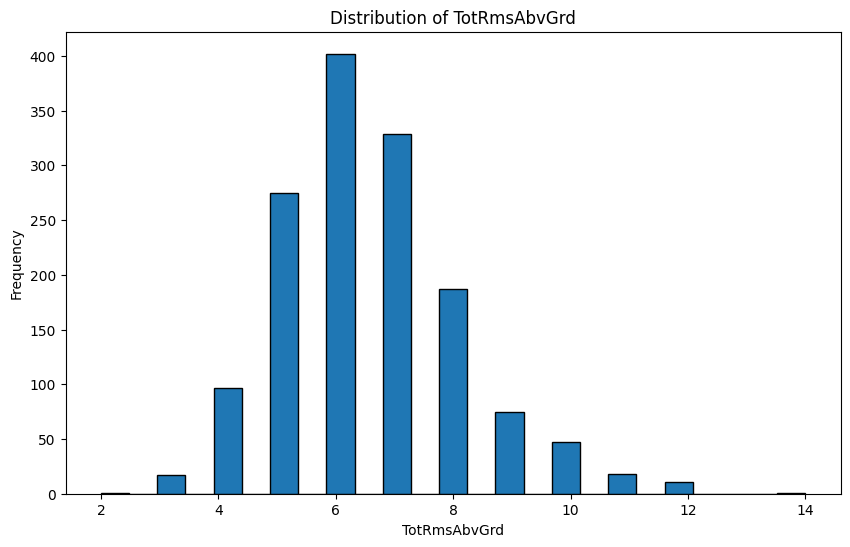

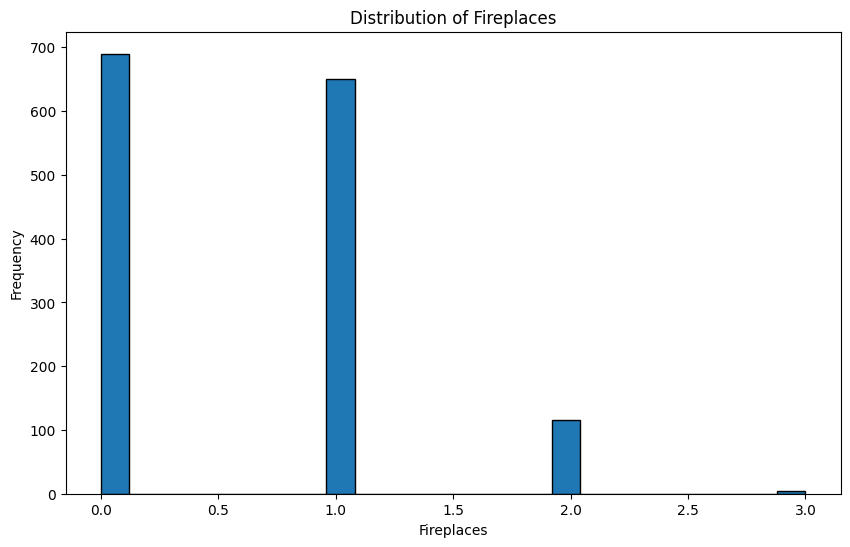

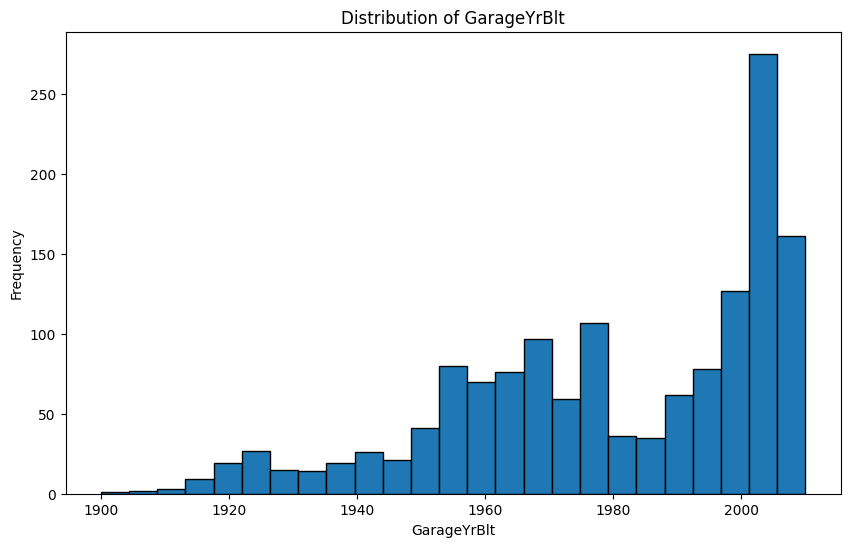

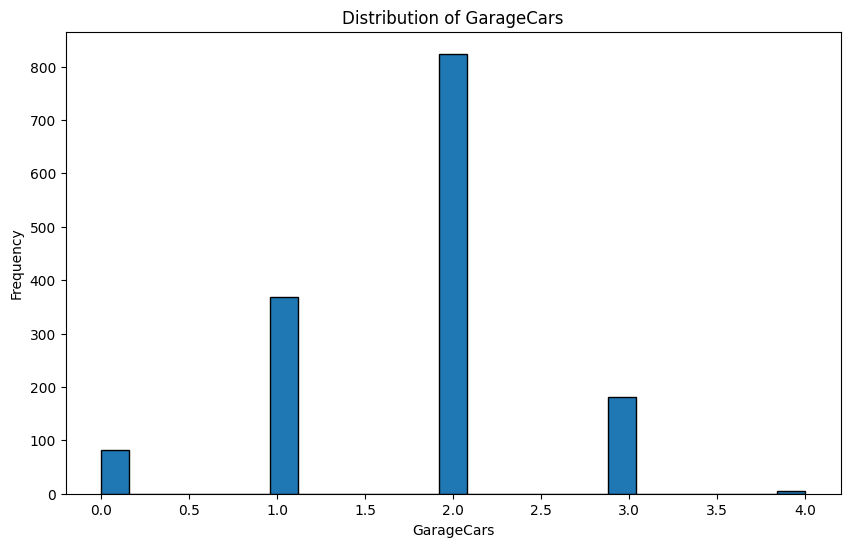

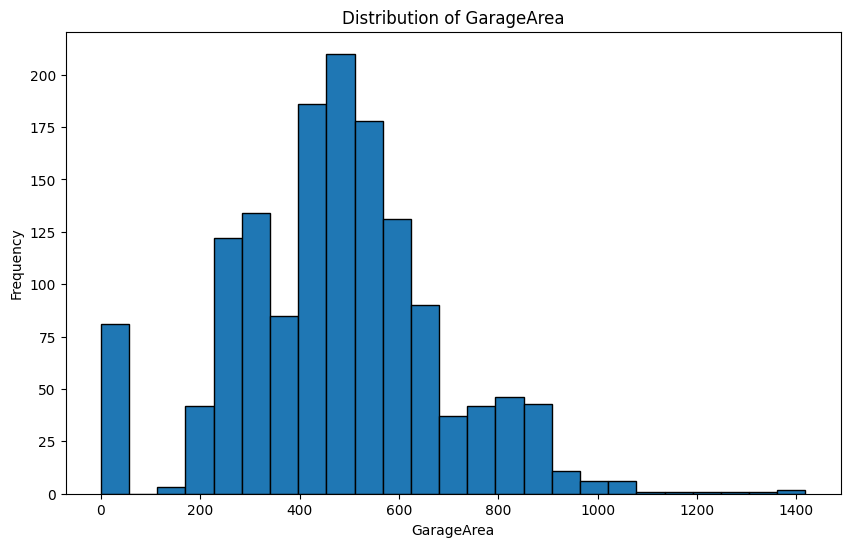

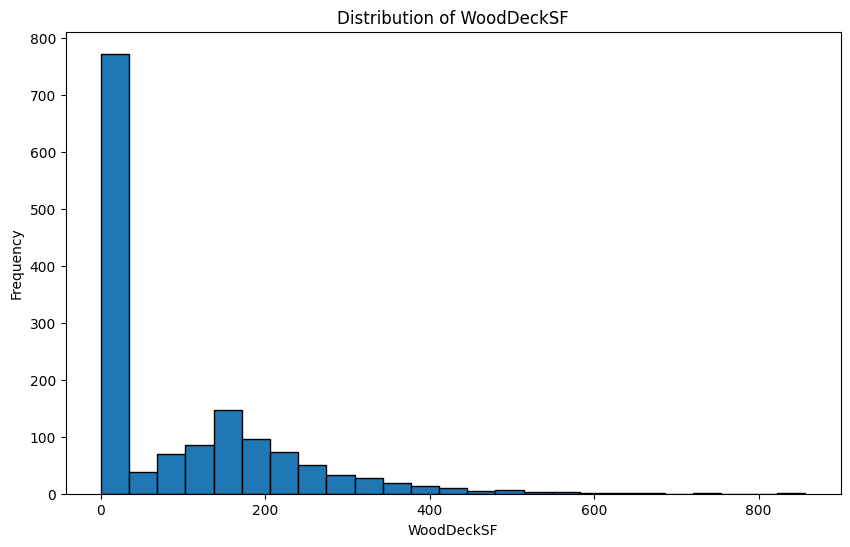

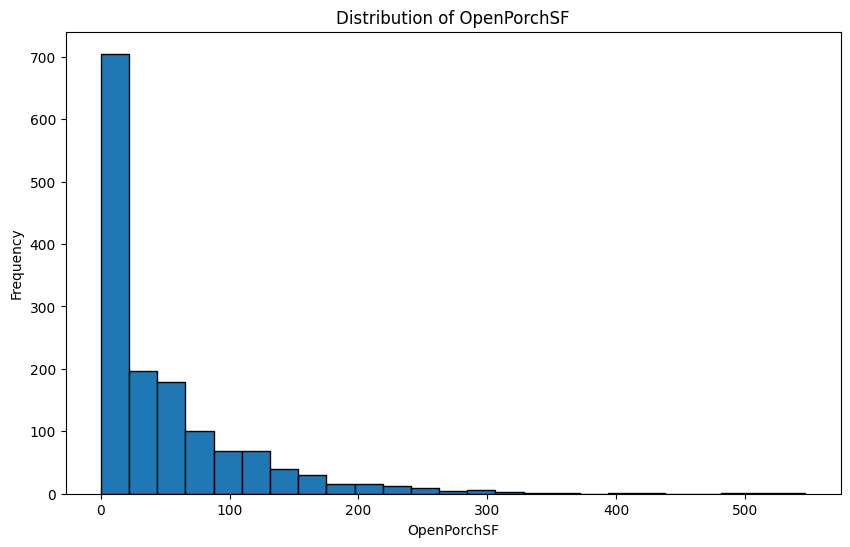

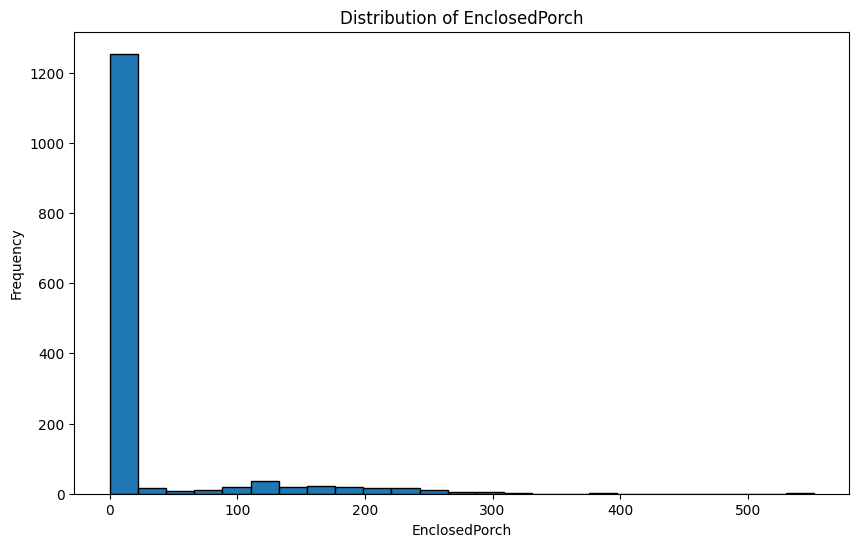

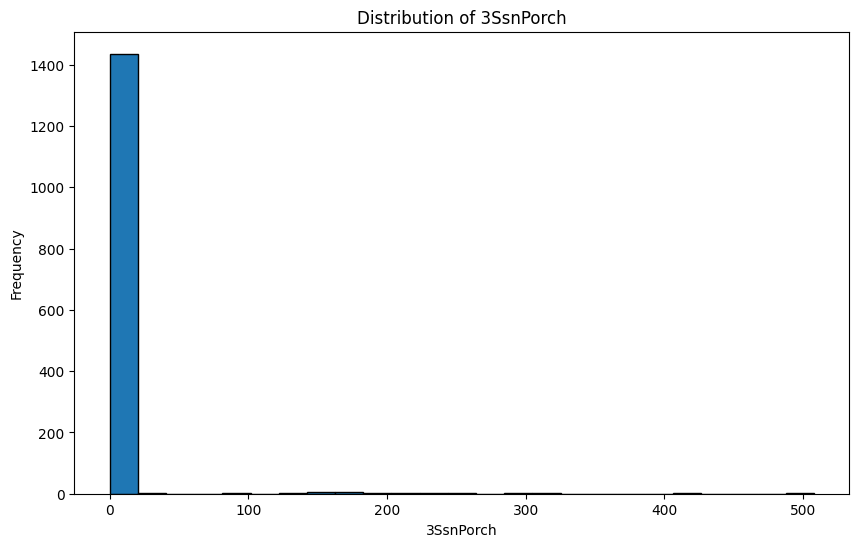

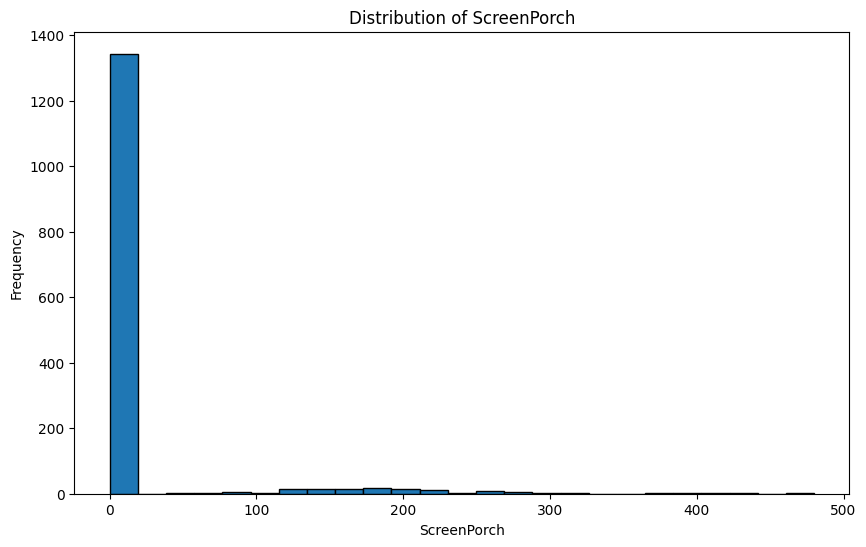

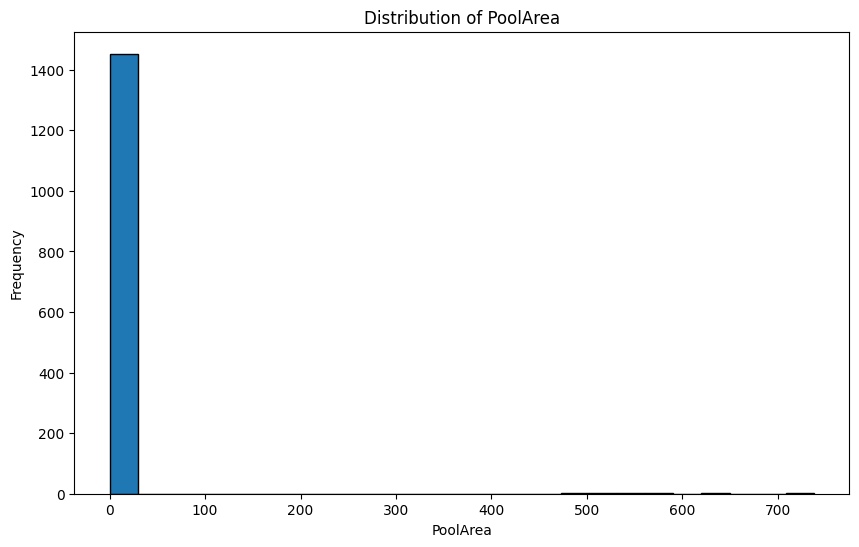

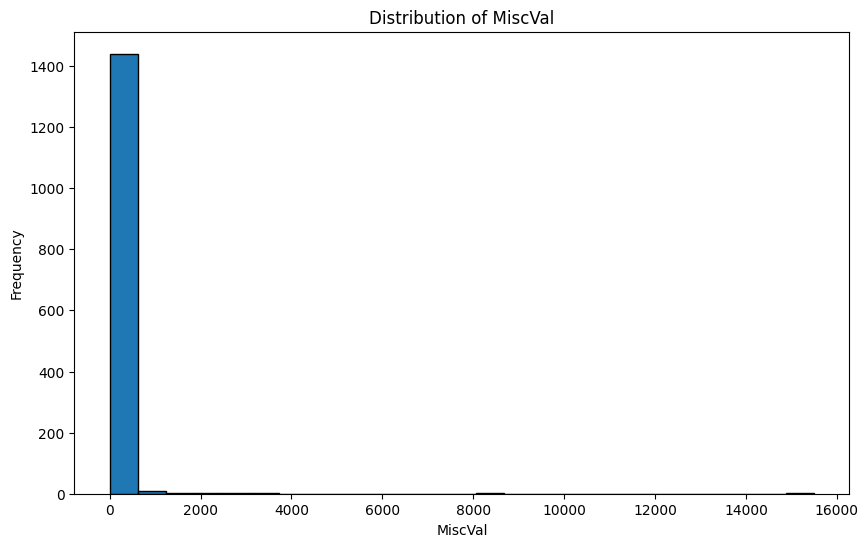

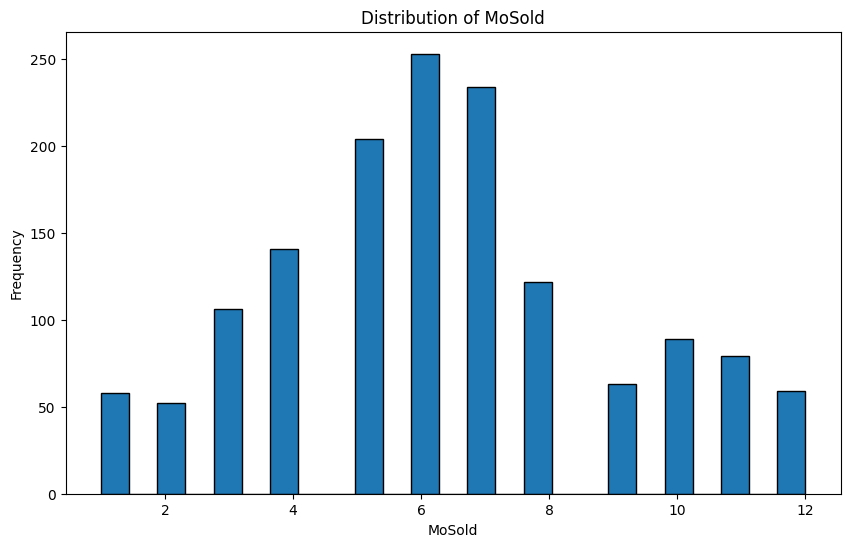

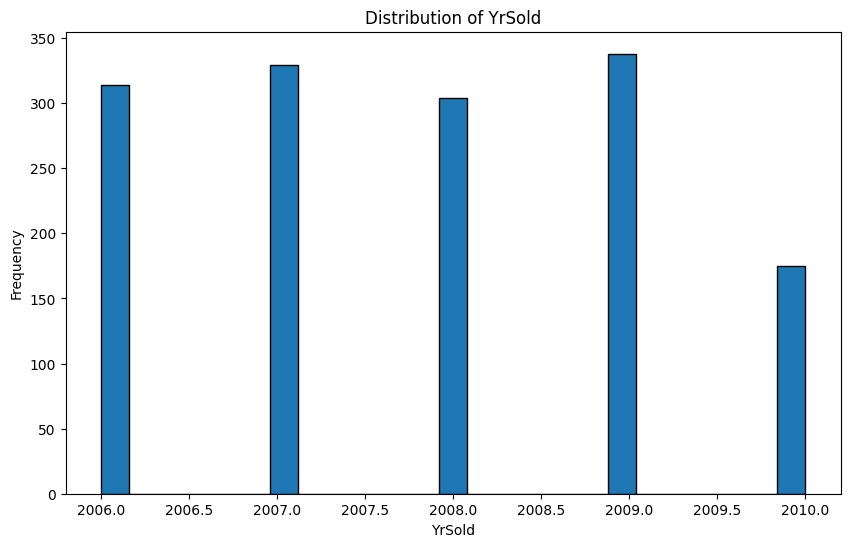

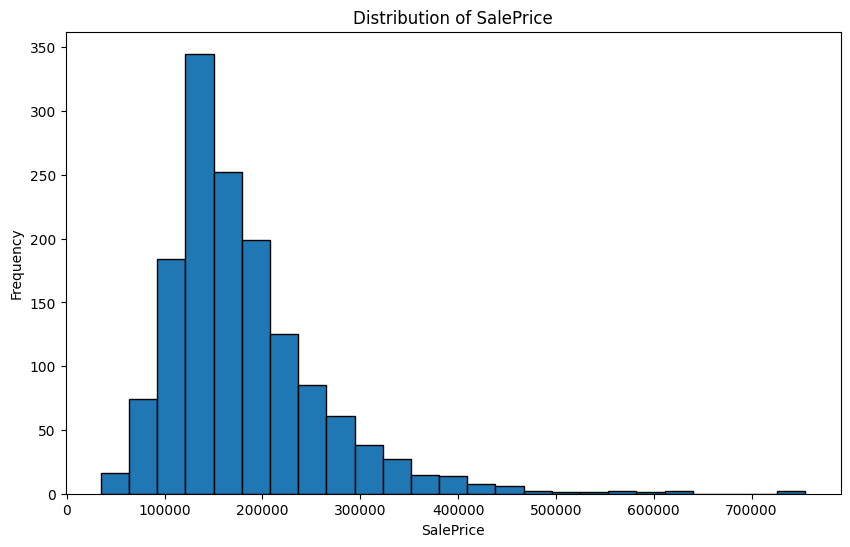

In [48]:
for numeric_col in numerical_columns: # passing each into a histogram
    plot_hist(df_cleaned, numeric_col, bins=25)  # <-- Adjust the number of bins as needed

After a first look we can see that some hist show us that there are values that are almost contants or that has just two or three values which are very imbalanced, so we will drop the following columns

In [49]:
numerical_columns

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [50]:
columns_to_drop = [
    'BsmtFinSF2',
    '2ndFlrSF',
    'LowQualFinSF',
    'BsmtHalfBath',
    'KitchenAbvGr',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal'
]

df_cleaned = df_cleaned.drop(columns=columns_to_drop)


In [51]:
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()

print(f"Amount of categorical columns: {len(categorical_columns)}")
categorical_columns

Amount of categorical columns: 35


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

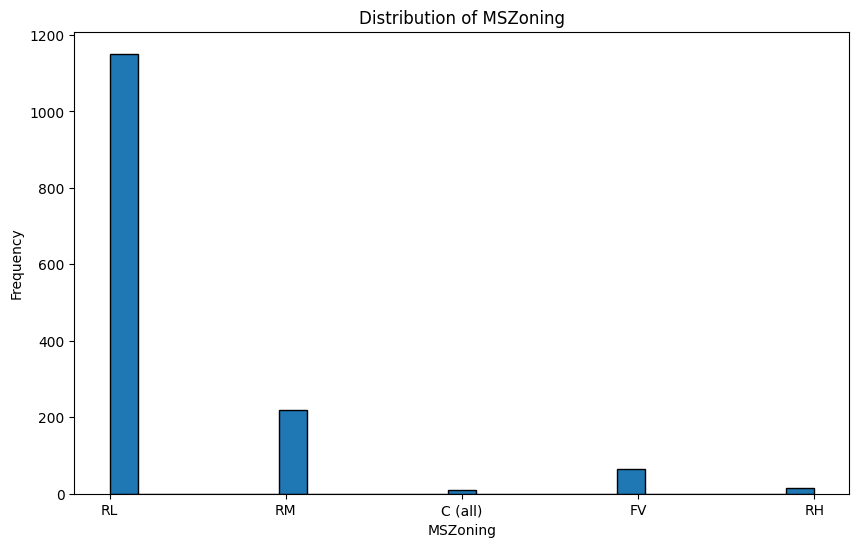

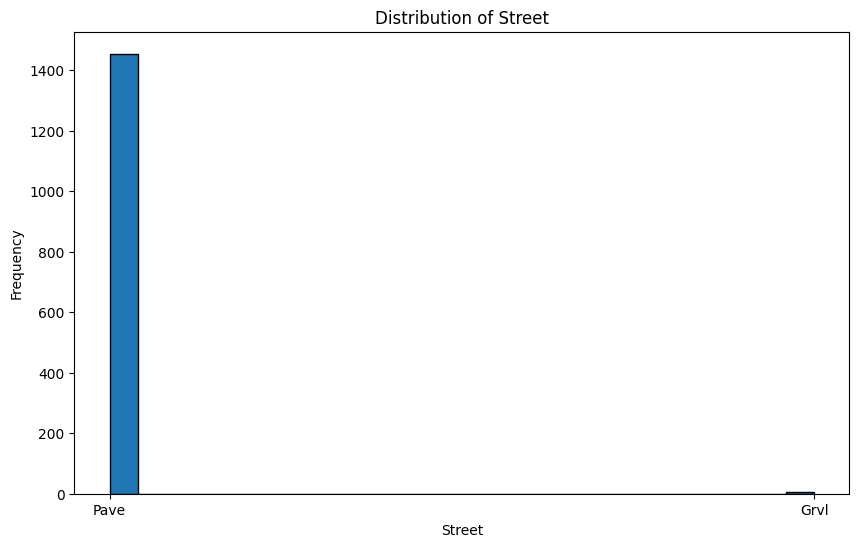

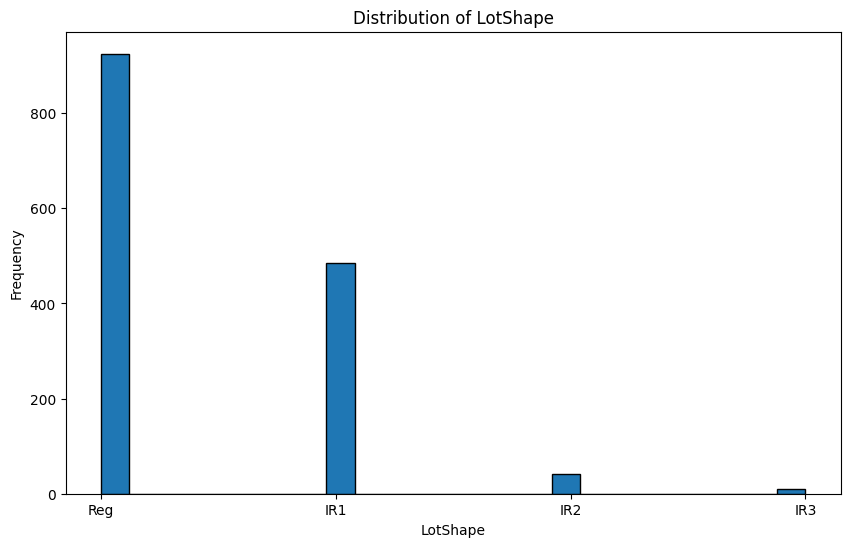

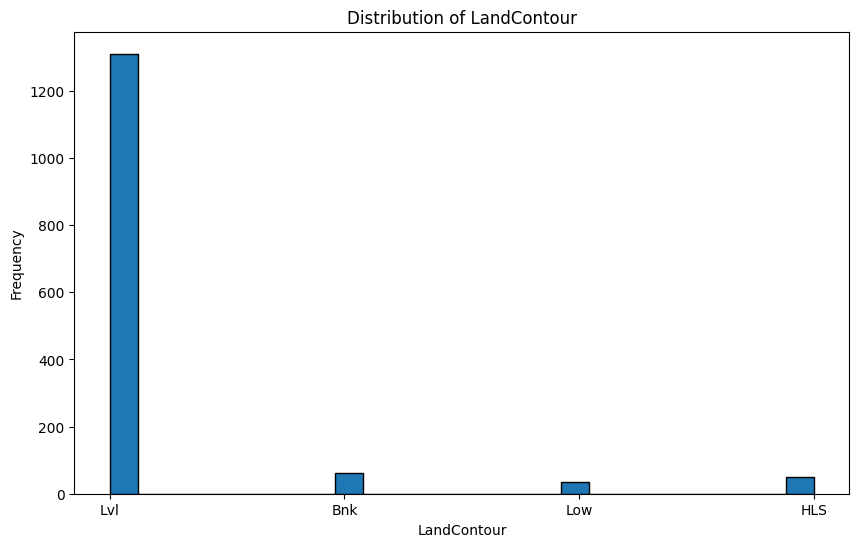

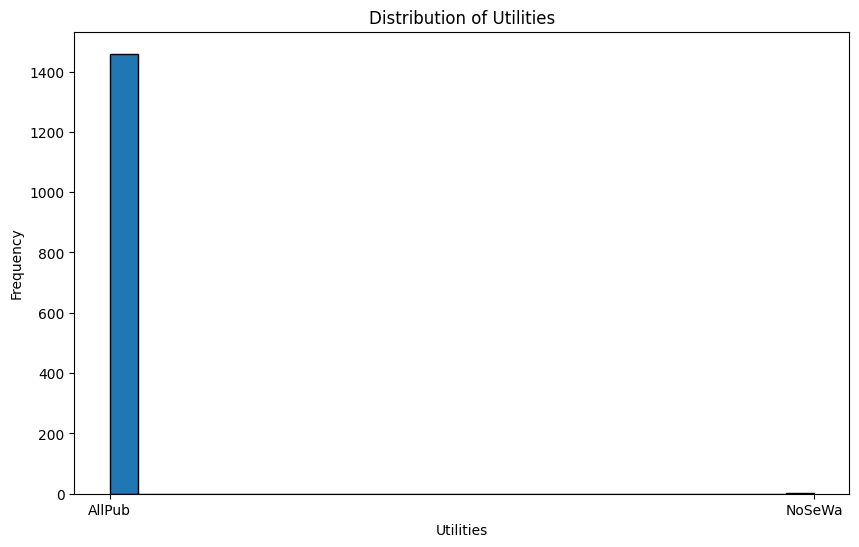

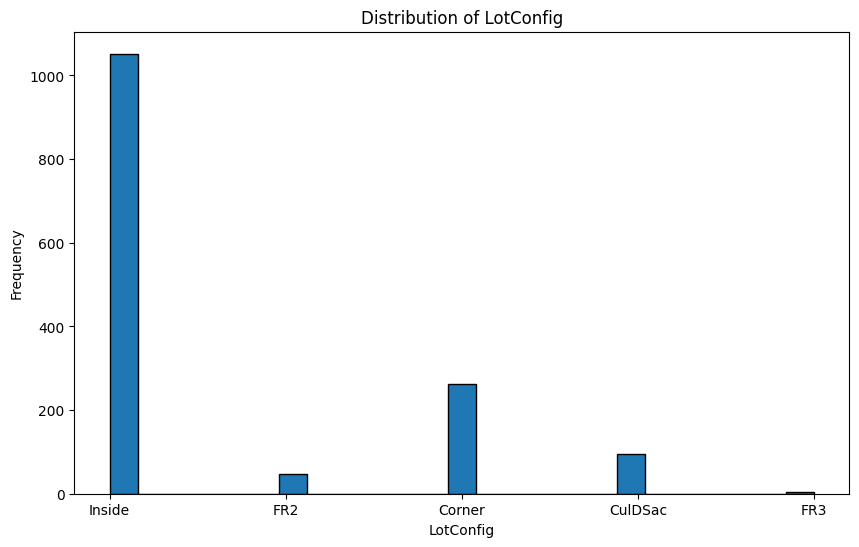

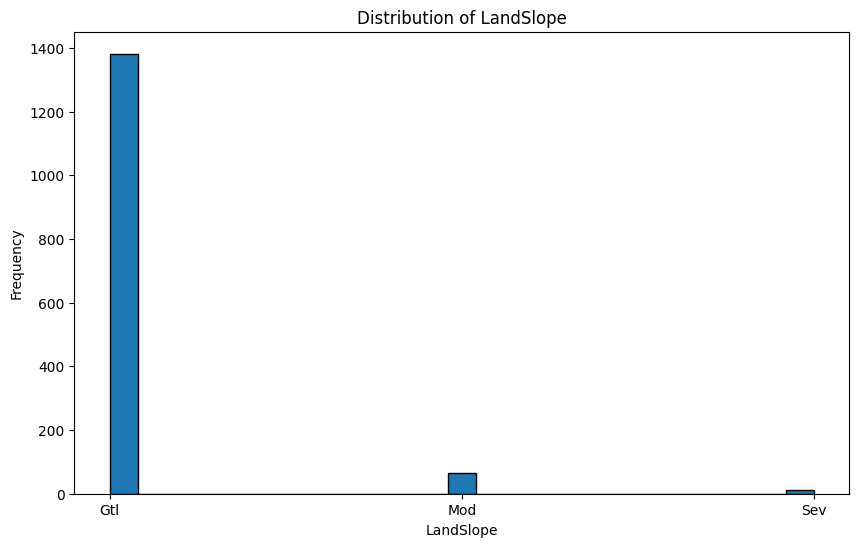

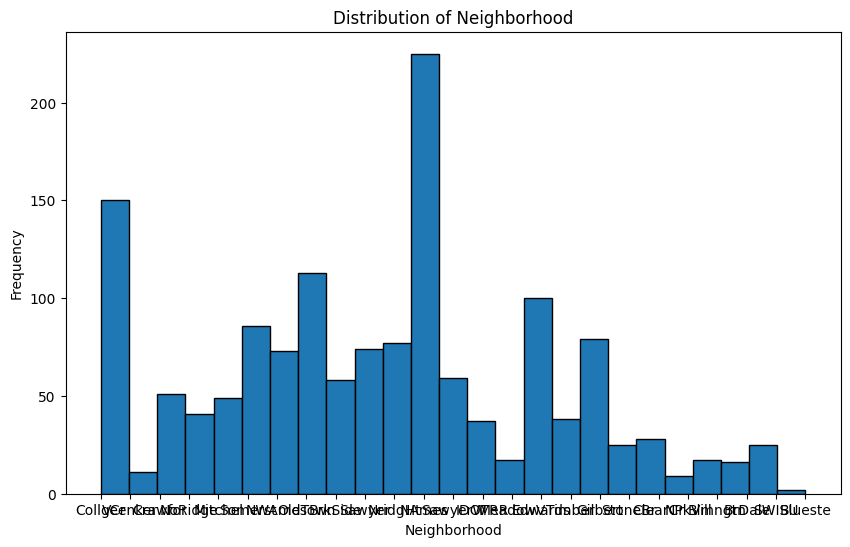

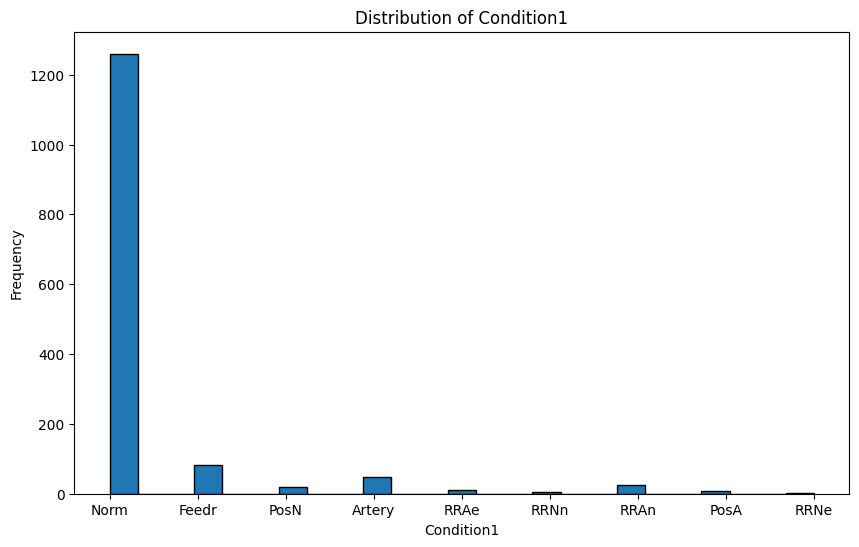

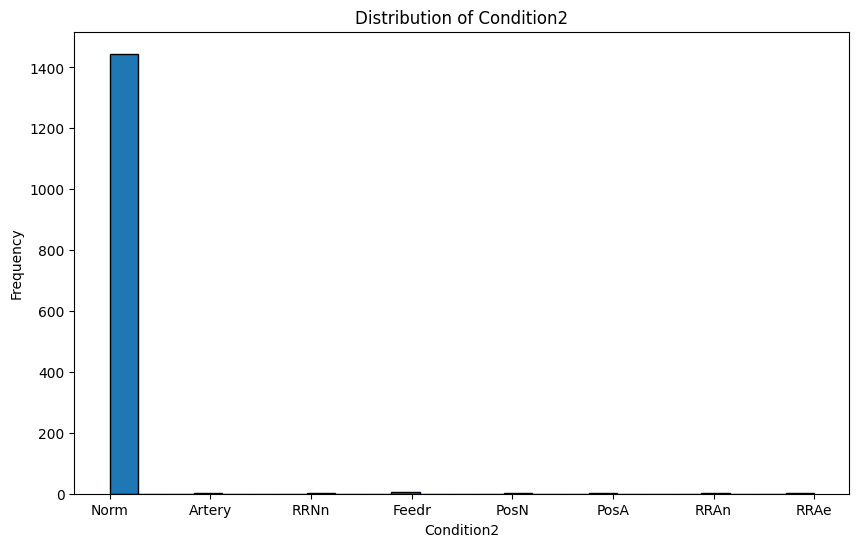

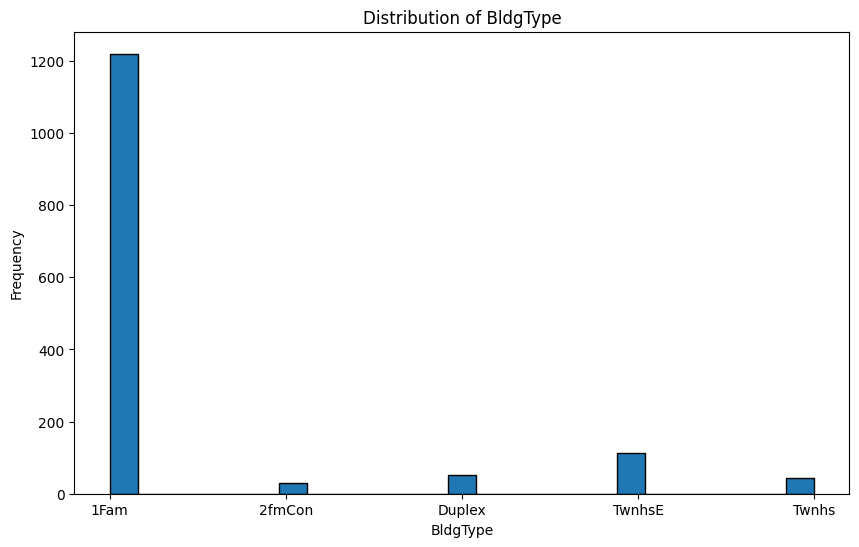

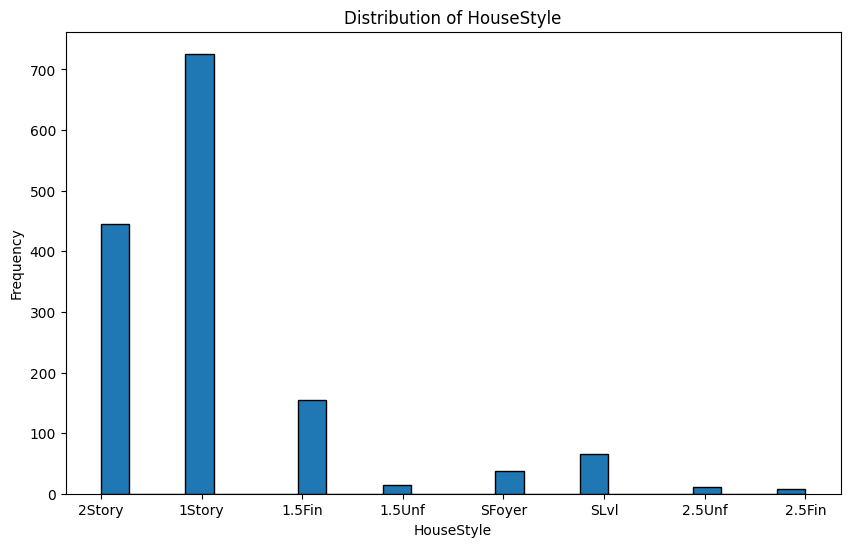

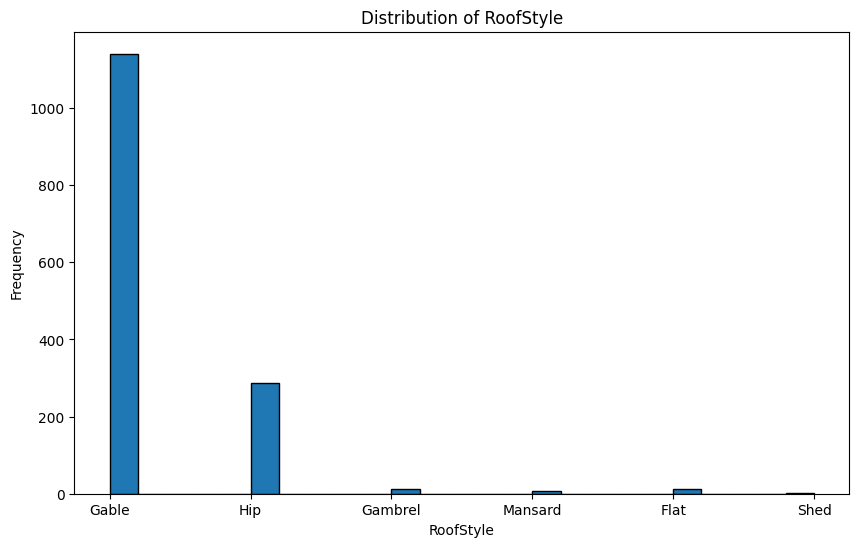

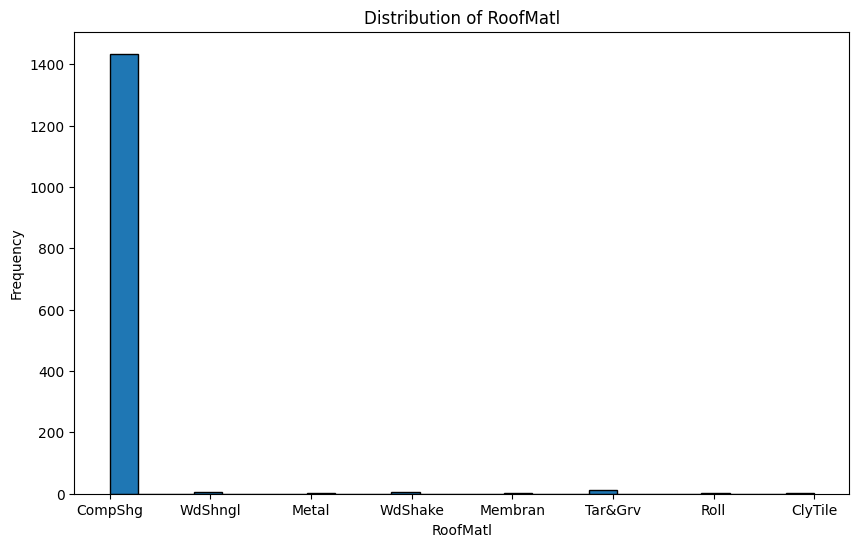

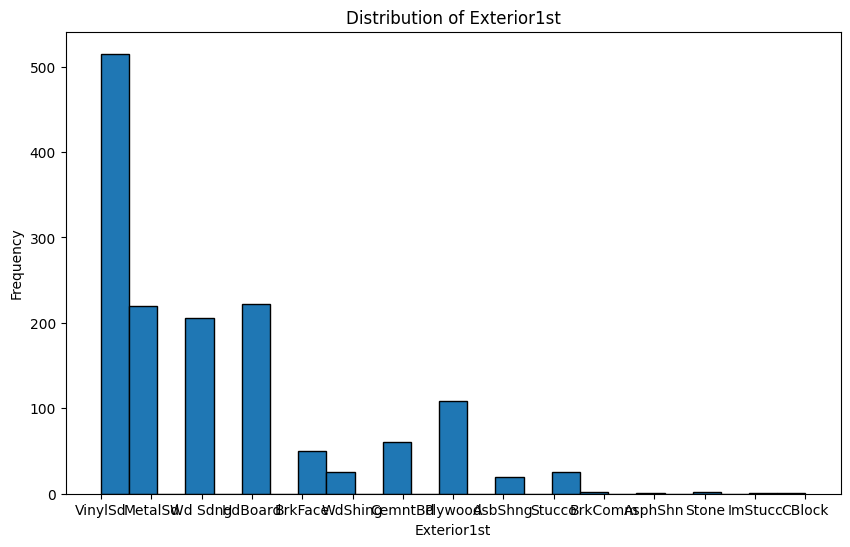

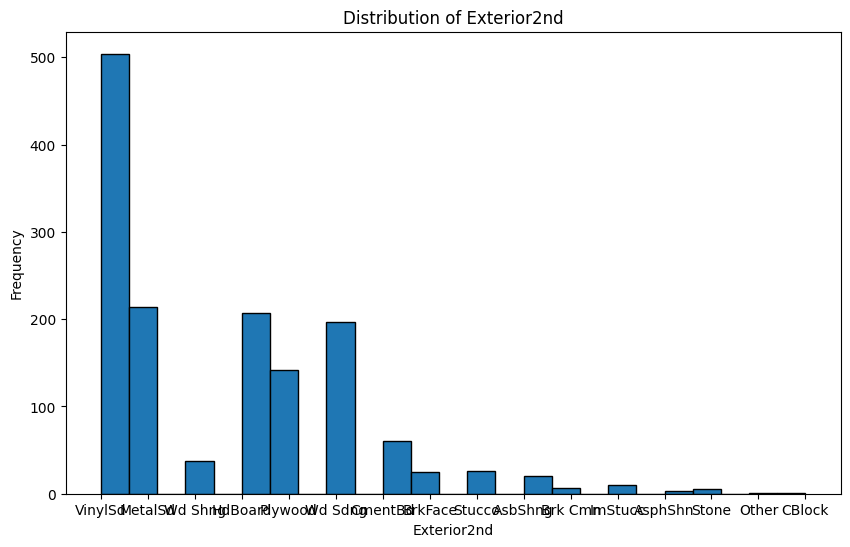

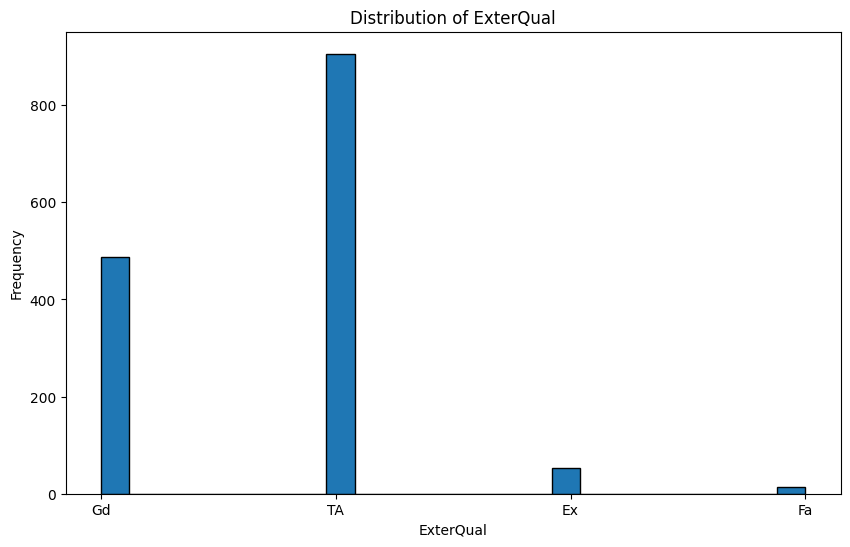

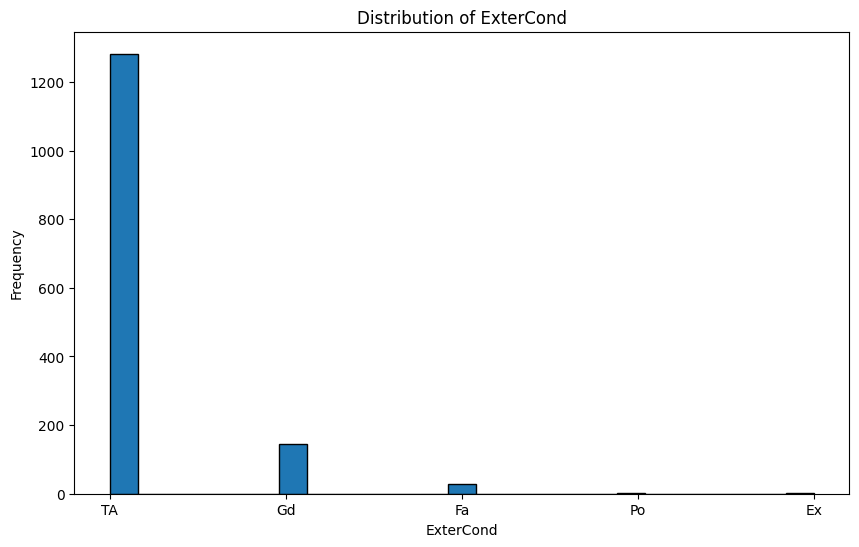

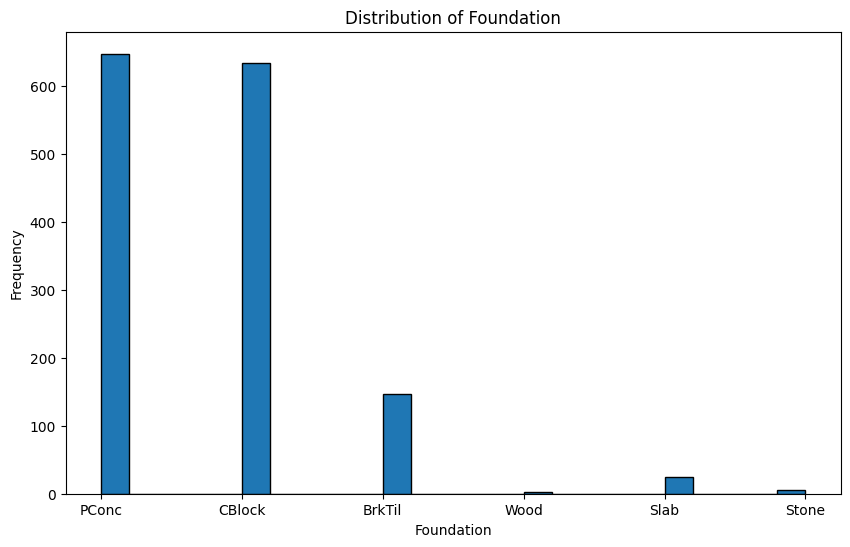

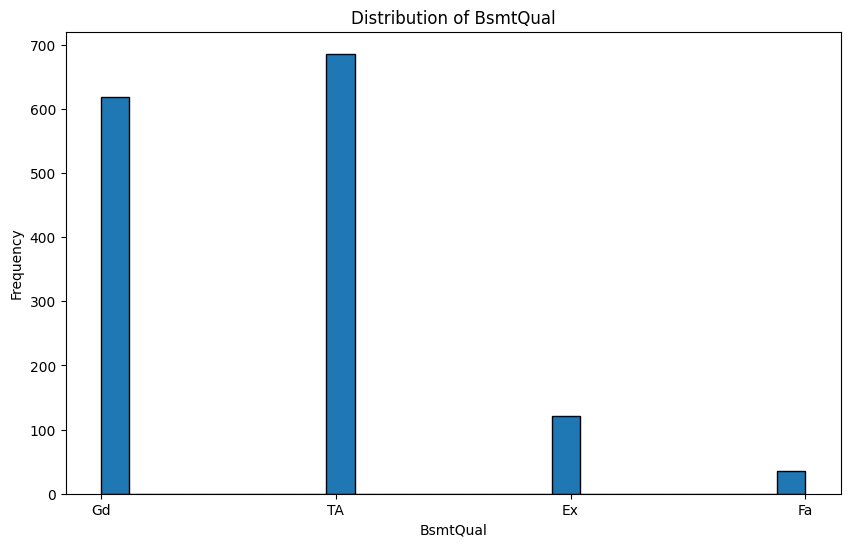

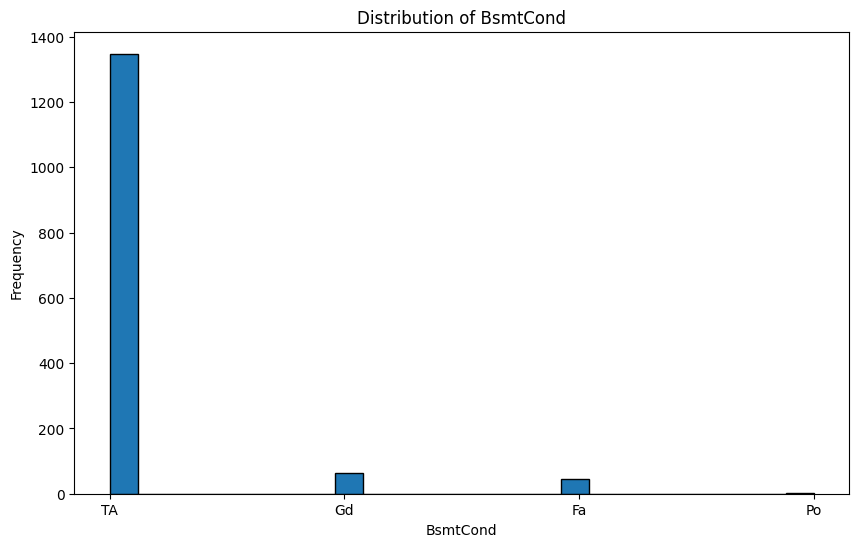

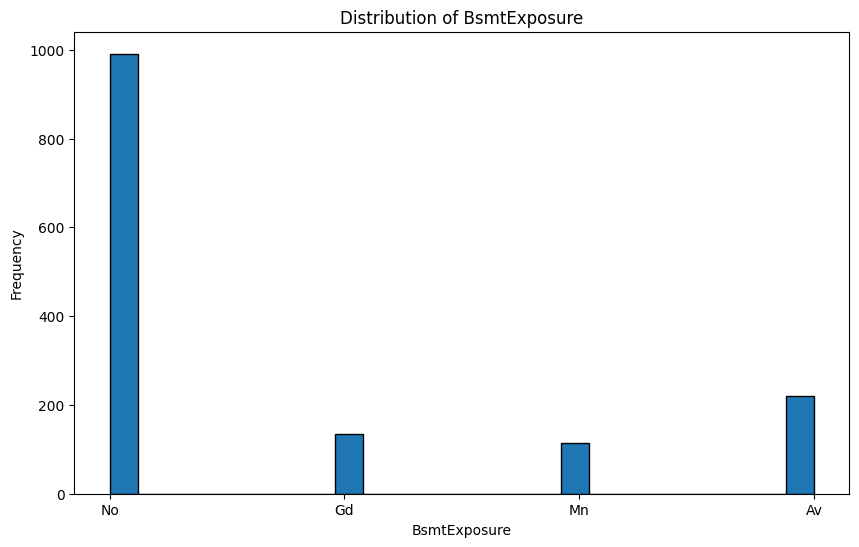

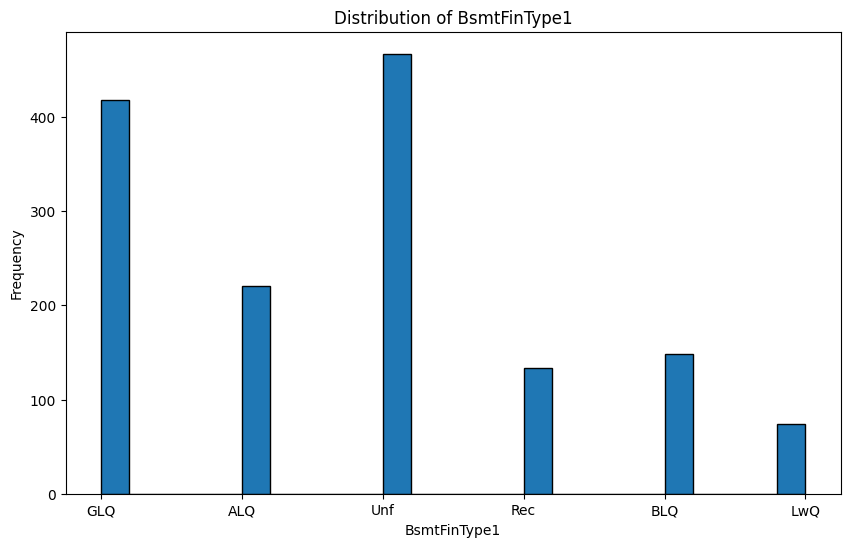

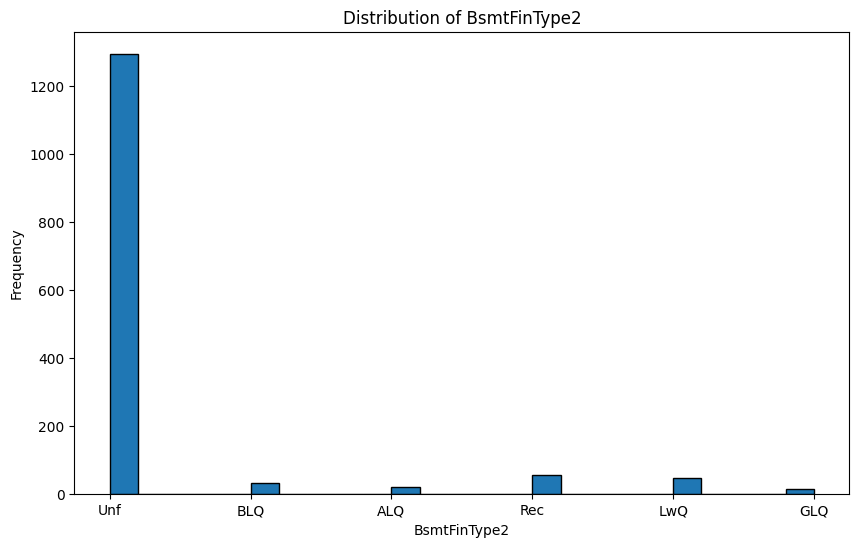

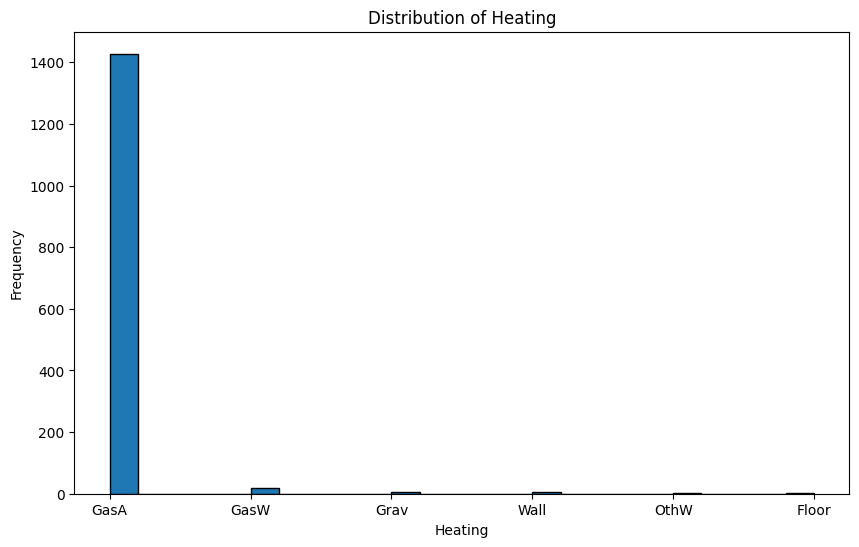

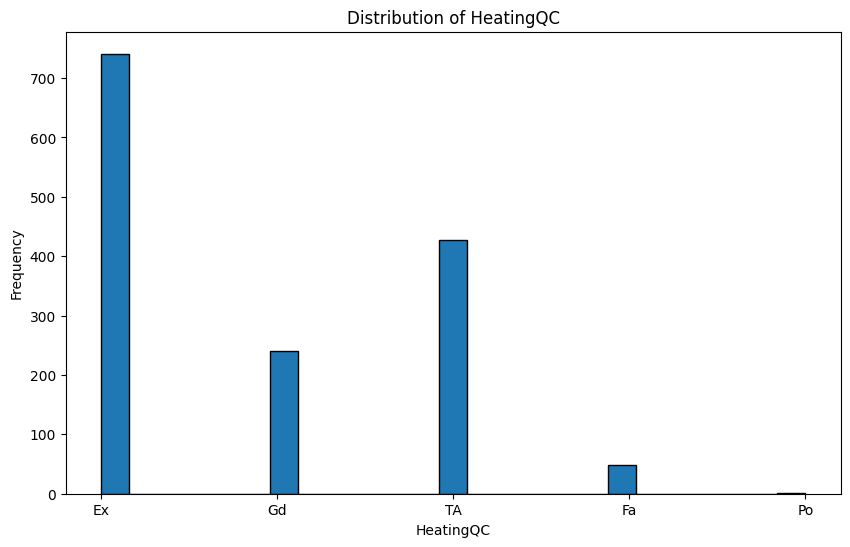

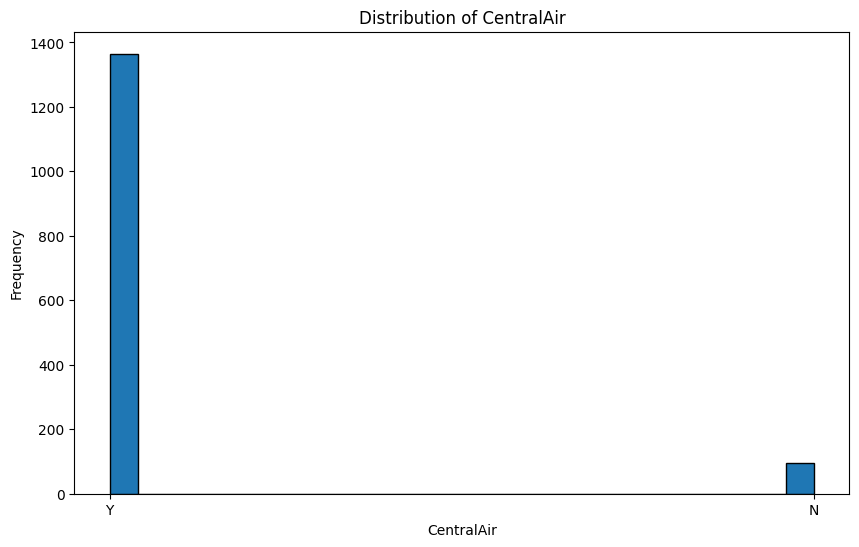

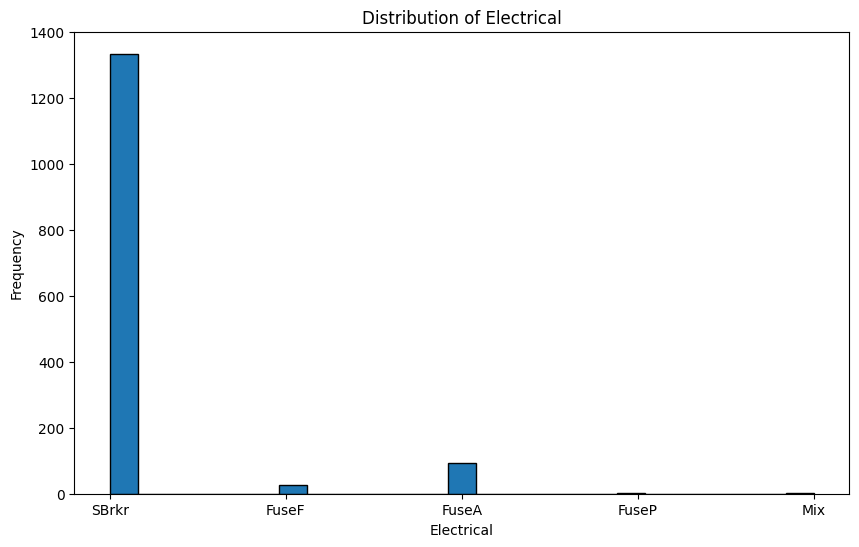

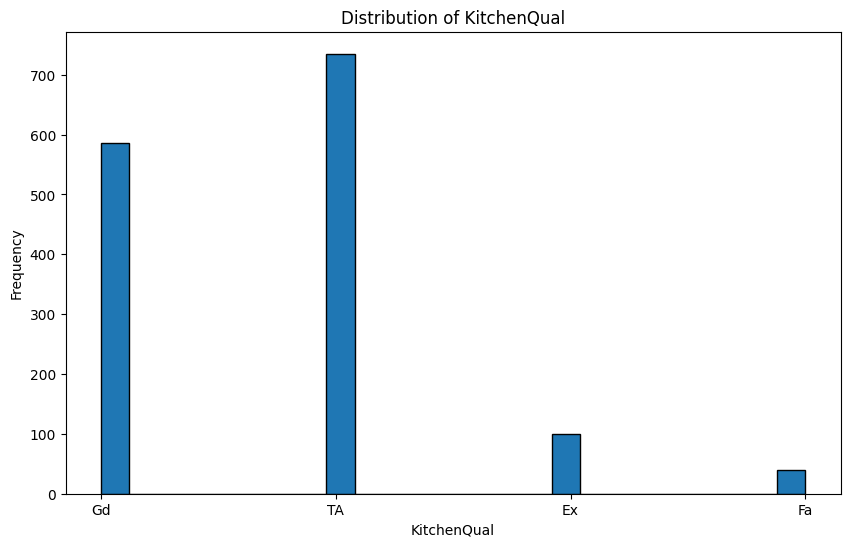

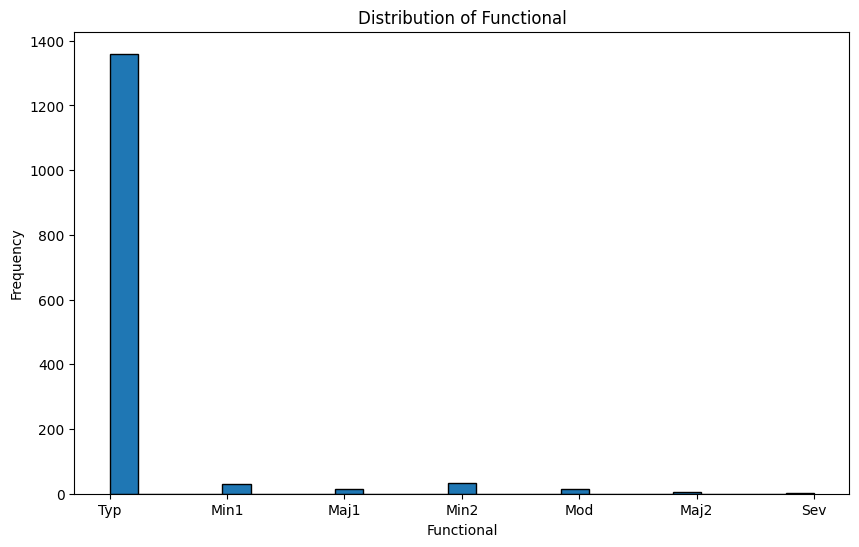

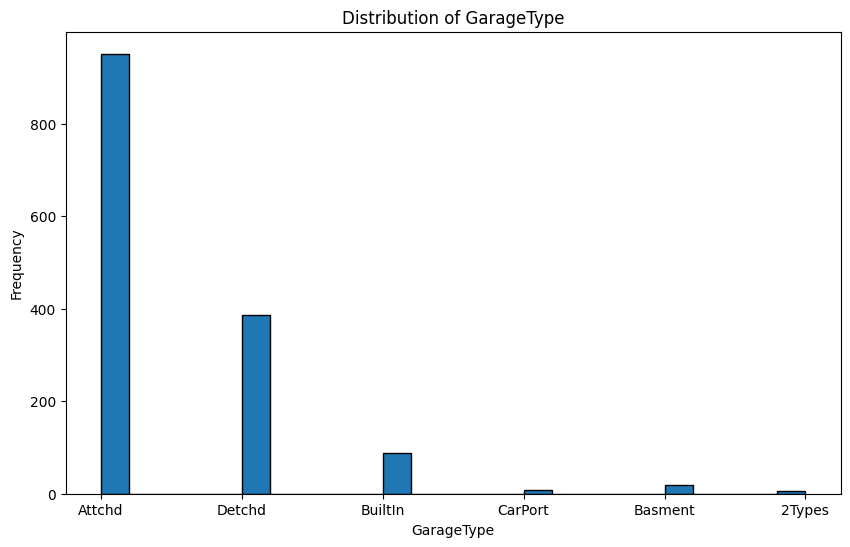

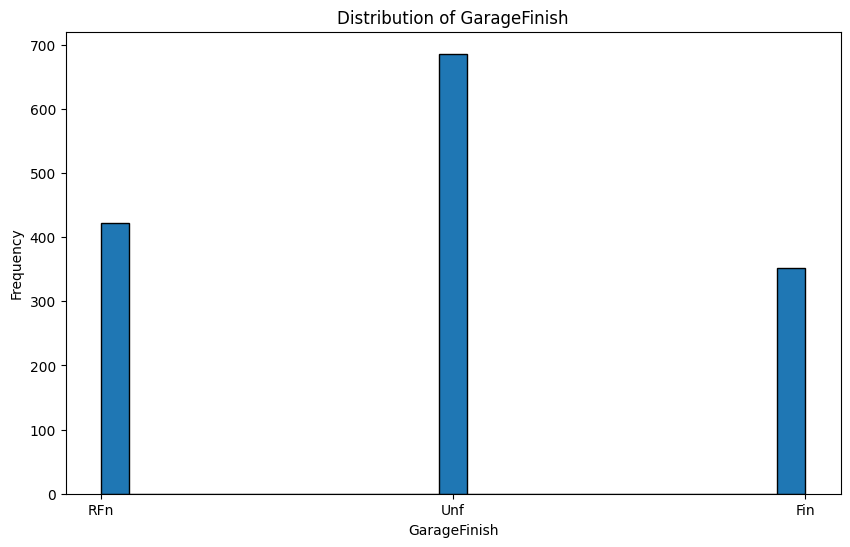

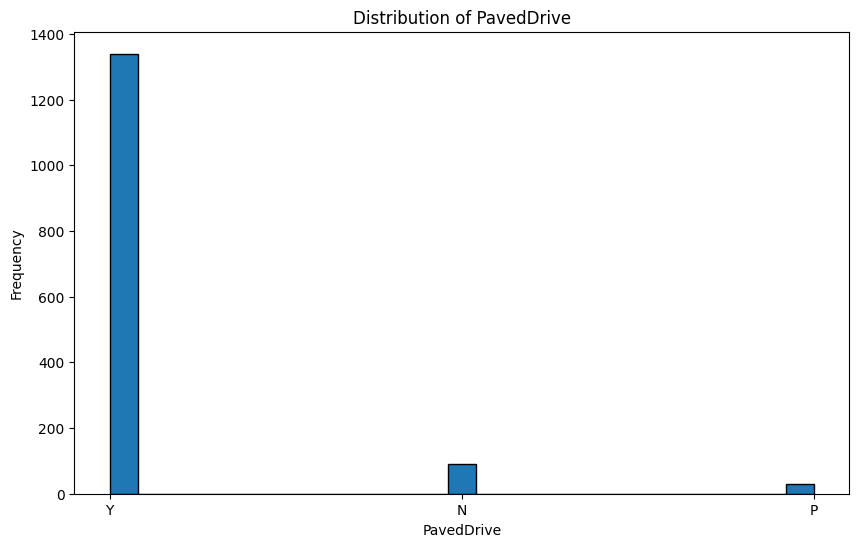

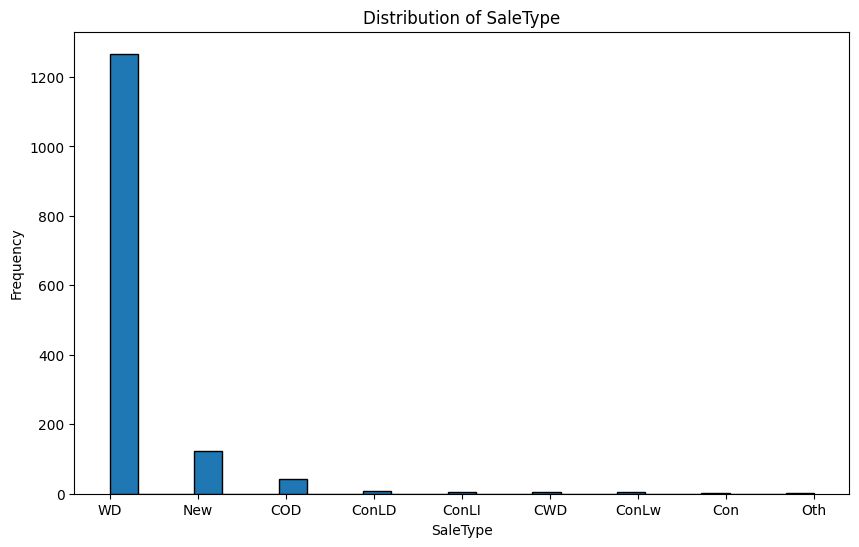

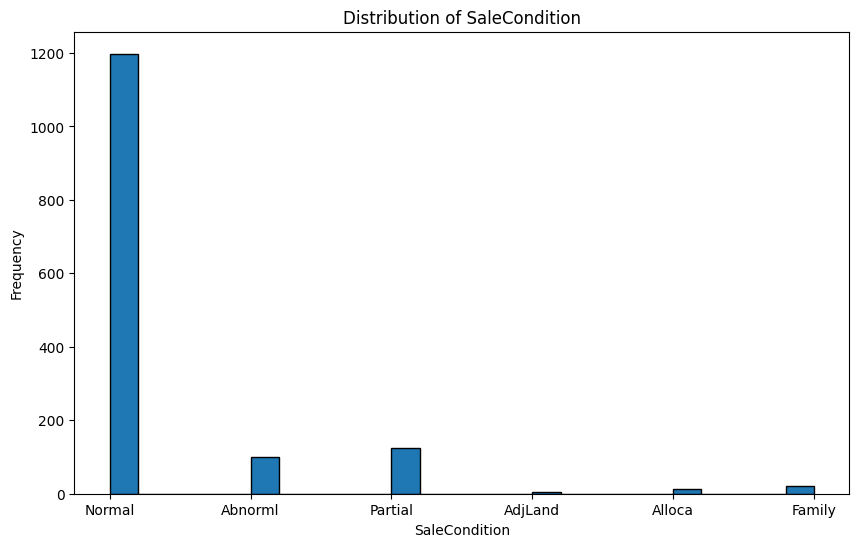

In [52]:
for cat_col in categorical_columns: # make a histogram for each categorical column
    plot_hist(df_cleaned, cat_col, bins=25)  # <-- Adjust the number of bins as needed

In [53]:
columns_to_drop = [
    'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 
    'RoofMatl', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 
    'Functional', 'PavedDrive'
]

df_cleaned = df_cleaned.drop(columns=columns_to_drop)


We also erase this columns since they have a huge proporcion of just one category than the other ones

In [54]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

In [55]:
df_cleaned.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'Electrical', '1stFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

We will drop the Id, since this feature is not worth for the final model

In [56]:
df_cleaned.drop(columns=['Id'], inplace=True)

In [57]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LotConfig      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   Condition1     1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrArea     1460 non-null   float64
 17  ExterQual      1460 non-null   object 
 18  ExterCon

It's time to check the outliers

In [58]:
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [59]:
import pandas as pd

# List to store outlier information
outlier_info_list = []

# Loop through numerical columns to find outliers
for num_col in numerical_columns:  # Make a table with the amount of outliers and the percentage of outliers
    q1 = df_cleaned[num_col].quantile(0.25)
    q3 = df_cleaned[num_col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df_cleaned[(df_cleaned[num_col] < lower_bound) | (df_cleaned[num_col] > upper_bound)]
    outlier_count = len(outliers)
    total_count = len(df_cleaned)
    outlier_percentage = (outlier_count / total_count) * 100

    # Append the result as a tuple
    outlier_info_list.append({
        'Column': num_col,
        'Outlier Count': outlier_count,
        'Outlier Percentage': outlier_percentage
    })

# Convert list to DataFrame
outlier_info = pd.DataFrame(outlier_info_list)

# Sort DataFrame by 'Outlier Count'
outlier_info = outlier_info.sort_values(by='Outlier Count', ascending=False)

# Display the result
outlier_info


,Column,Outlier Count,Outlier Percentage
3,OverallCond,125,8.561644
0,MSSubClass,103,7.054795
6,MasVnrArea,98,6.712329
22,OpenPorchSF,77,5.273973
1,LotArea,69,4.726027
9,TotalBsmtSF,61,4.178082
25,SalePrice,61,4.178082
15,BedroomAbvGr,35,2.397260
21,WoodDeckSF,32,2.191781
11,GrLivArea,31,2.123288


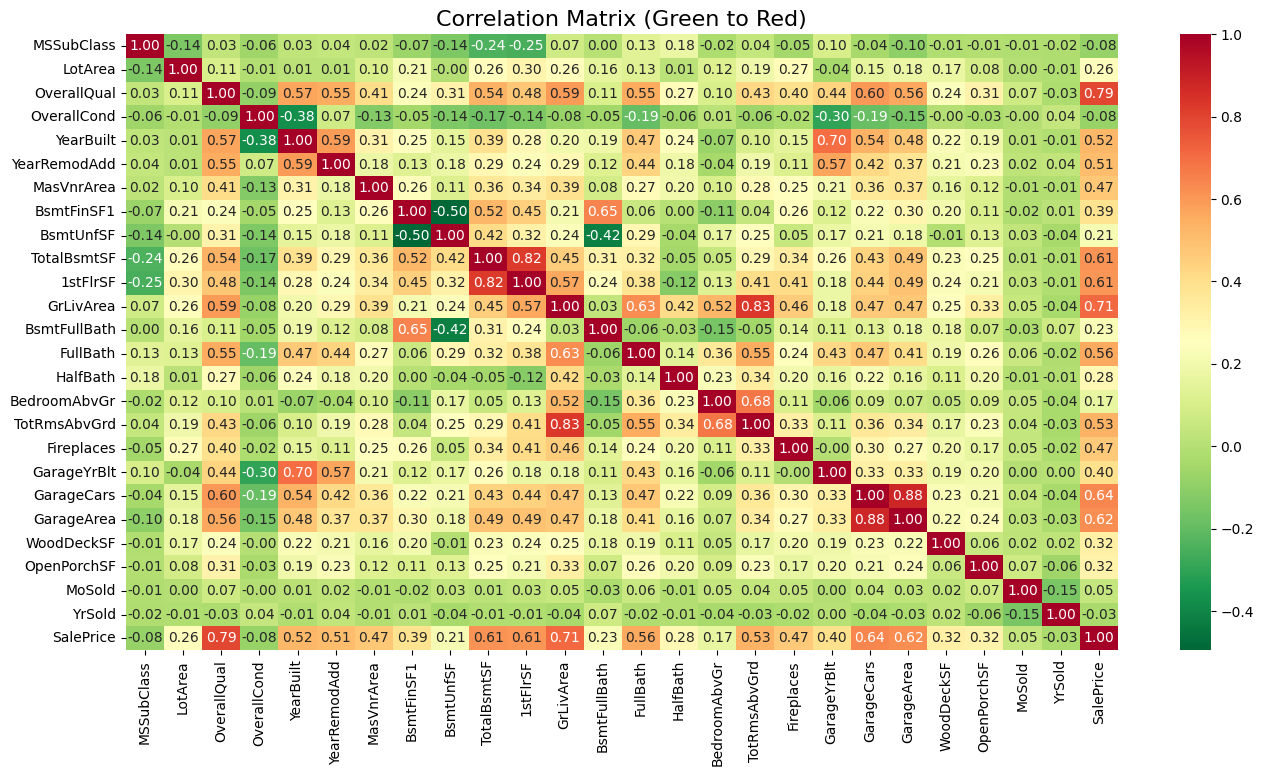

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

num_df = df_cleaned[numerical_columns]
corr_matrix = num_df.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='RdYlGn_r',  # Green to Red
    fmt=".2f",
    xticklabels=numerical_columns,
    yticklabels=numerical_columns
)
plt.title('Correlation Matrix (Green to Red)', fontsize=16)
plt.show()
